# Исследование данных о российском кинопрокате



## Описание.

Заказчик — Министерство культуры Российской Федерации. <br>
Нужно изучить рынок российского кинопроката и выявить текущие тренды.  Узнать насколько фильмам, которые получили государственную поддержку, интересны зрителю. <br>
Данные предоставленны в двух таблицах: mkrf_movies и mkrf_shows.<br>
<br>
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. Описание данных:
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.<br>
<br>
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах:
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.


## План проекта

- Загрузка данных, объединение и изучение общей информации
- Предобработка данных
- Исследовательский анализ данных
- Исследование фильмов, которые получили государственную поддержку
- Общий вывод

## Загрузка данных, объединение и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

Посмотрим на таблицы:

In [3]:
display(data_movies.head(3))
display(data_shows.head(3))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.4


Посмотрим информацию по двум таблицам.

In [4]:
data_movies.info()
print()
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В таблицах есть одинаковый столбец `puNumber` по нему и будем объединять. Для начала в таблице data_movies поменяем тип данных в столбце `puNumber`.

In [5]:
#data_movies['puNumber'] = data_movies['puNumber'].astype('int') #замена типа данных
data_movies.loc[data_movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


При попытки замены типа данных выдало что в одной строке содержится не числовое значение 'нет'. Это соответствует строке с индексом 1797. Согласно сайта "Портал открытых данных
МИНИСТЕРСТВА КУЛЬТУРЫ РОССИЙСКОЙ ФЕДЕРАЦИИ"(http://opendata.mkrf.ru/) данный фильм имеет номер прокатного удостоверения  111009614. Проверим есть ли в данных запись с таким номером прокатного удостоверения в столбце `puNumber`.

In [6]:
data_movies.loc[data_movies['puNumber'] == '111009614']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Проверка показала что в данных существует запись с таким значением, то есть это дубль. Удалим строку с индексом 1797 и перезапишем индексы.

In [7]:
data_movies = data_movies.drop(index=[1797]).reset_index(drop=True)

#проверка:
data_movies.loc[data_movies['puNumber'] == '111009614']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
2077,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#меняем тип данных в столбце 'puNumber':
data_movies['puNumber'] = data_movies['puNumber'].astype('int')

Проверяем результат:

In [9]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Замена типа данных в столбце `puNumber` произведена.<br>
Объединяем таблицы по столбцу `puNumber`, за основу возьмем таблицу data_movies.

In [10]:
data = data_movies.merge(data_shows, on='puNumber', how='left')

#проверка:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод:** <br>
- **Изучены обе полученные таблицы.**
- **Удалина одна неверная дублирующая запись.**
- **Таблицы объеденены в одну по столбцу `puNumber`-номер прокатного удостоверения.**
- **Объединение таблиц прошло успешно. В итоговой таблице есть столбец `box_office` с количеством значений 3158 (количество не изменилось).**
- **В финальной таблице `data` содержит 7484 записи в 16 столбцах.**

**Финальная таблица готова для дальнейшей обработки.**

## Предобработка данных

### Проверим типы данных

Для начала исправим название столбца `puNumber` на pu_number.

In [11]:
data.rename(columns = {'puNumber':'pu_number'}, inplace = True )
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [12]:
data.info()
display(data.head(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


В столбце `show_start_date` необходимо поменять тип на datetime и в столбце `ratings` поменять тип на float.

In [13]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
data['show_start_date'].head(3)

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

In [14]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В данных столбца `ratings` есть значения в процентном выражении. Рейтинг фильмов исчисляется значениями от 1 до 10.<br>
Избавимся в значениях от процентов и переведем к шкале 1-10.

In [15]:
data['ratings'] = data['ratings'].replace('%', '', regex = True)
data['ratings'] = data['ratings'].astype('float64')
data.loc[data['ratings'] > 10, 'ratings'] = data['ratings']/10

data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [16]:
#проверяем:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Вывод:** <br>
- **Переменовали один столбец `puNumber` в соответствии стандарта PEP8.**
- **В двух столбцах `show_start_date` и `ratings` поменяли тип данных.**

### Обработка пропусков в датафрейме

In [18]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

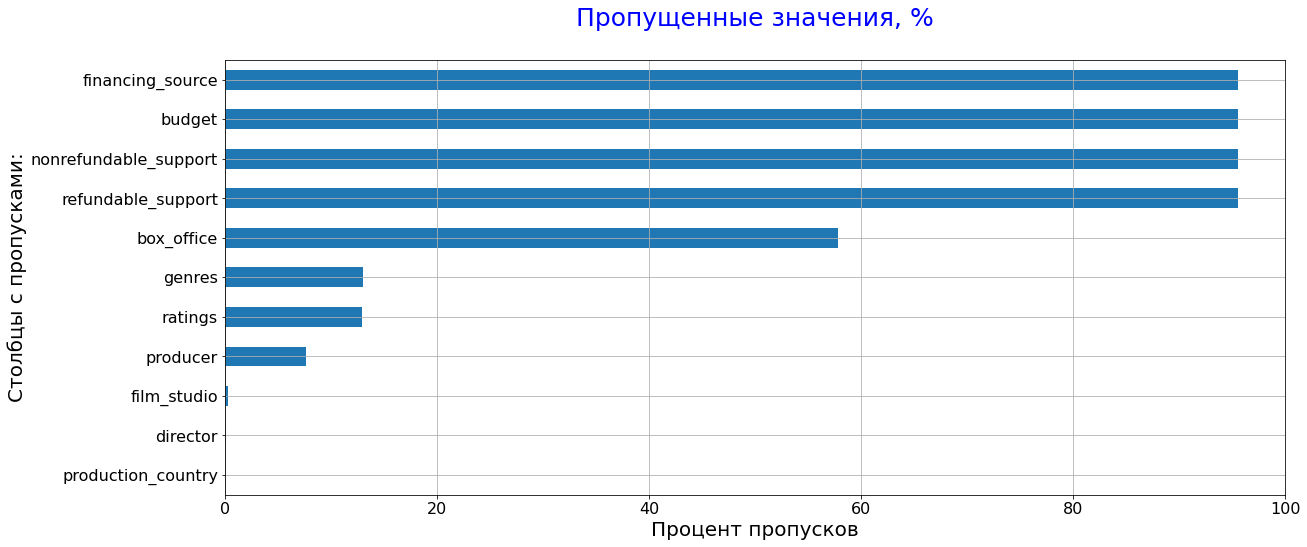

In [19]:
# пропущенные значения бары

def pass_value_barh(data):
    (data.isna().mean()*100)\
    .to_frame()\
    .rename(columns = {0:'space'})\
    .query('space > 0')\
    .sort_values(by = 'space', ascending = True)\
    .plot(kind = 'barh', figsize = (19,8), legend = False, fontsize = 16, grid=True)\
    ;
    plt.title('Пропущенные значения, %' + "\n", fontsize=25, color='Blue')
    plt.xlabel('Процент пропусков', fontsize=20)
    plt.ylabel('Столбцы с пропусками:', fontsize=20)
    plt.xlim(0, 100)
pass_value_barh(data)

In [20]:
print('Количество пропусков в %:')
(data.isna().mean()*100).round(1)

Количество пропусков в %:


title                     0.0
pu_number                 0.0
show_start_date           0.0
type                      0.0
film_studio               0.2
production_country        0.0
director                  0.1
producer                  7.6
age_restriction           0.0
refundable_support       95.6
nonrefundable_support    95.6
budget                   95.6
financing_source         95.6
ratings                  12.9
genres                   13.0
box_office               57.8
dtype: float64

В данных 7484 строки.
- Самое большое количество пропусков в столбцах `refundable_support`, `nonrefundable_support`, `financing_source`, `budget`. Количество пропусков одинаково и лишь у 4.4% есть данные. Получается что только у фильмов получившие гос. поддержку есть данные. Оставим без изменений.
- В столбце `box_office`(сборы в рублях) у больше половины фильмов нет данных по этому параметру. Заменить их верными данными нет возможности — оставим без изменения.
- В столбце `ratings`(рейтинг фильма на КиноПоиске) по этому параметру возможно на Кинопоиске нет данных, т.к. нет оценок. Оставим без изменения.
- В столбце `genres`(жанр фильма) у 13% фильмов имеются пропуски. Востановить верно нет возможности. Заменим на "неизвестно".
- В столбцах `producer`,`film_studio`,`director` небольшое количество пропусков. Для дальнейшего иследования эти значения не важны. Заменим на "неизвестно".
- В столбце `production_country`(страна-производитель) 2 пропуска. Заменим на подходящее значение.

In [21]:
skipping_data = ['genres', 'producer', 'film_studio', 'director']
for row in skipping_data:
    data[row]= data[row].fillna('неизвестно')

**Замена пропуска в столбце `production_country`(страна-производитель):**

In [22]:
data.loc[data['production_country'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,неизвестно,NaN,неизвестно,неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Пропуск заменим на соответствующее значение "Россия":

In [23]:
data.loc[3185, 'production_country'] = 'Россия'
data.loc[4440, 'production_country'] = 'Россия'

In [24]:
#проверка
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                      0
box_office               4327
dtype: int64

**Вывод:**<br>
**Пропуски обработаны и изучены.**

### Обработка дубликатов в датафрейме

In [25]:
print('Количество явных дубликатов: ', data.duplicated().sum())

Количество явных дубликатов:  0


Явных дубликатов в данных нет. <br>
Проверим отдельно столбцы `title`, `pu_number` на наличие дубликатов.

In [26]:
data['pu_number'].value_counts()

221054410    2
221154310    2
122001411    1
111008518    1
114002716    1
            ..
221015415    1
121021814    1
224028210    1
121013618    1
126002916    1
Name: pu_number, Length: 7483, dtype: int64

In [27]:
display(data[data['pu_number'] == 221054410])
display(data[data['pu_number'] == 221154310])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


Обратимся к сайту Министерства культуры РФ (https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/). У фильма может быть несколько прокатных удостоверений. Номер прокатного удостоверения нам для дальнейшего анализа не нужен. Оставим без изменений.

Проверим на наличие дубликатов в столбце `title`(название фильма):

In [28]:
data['title'].value_counts()

День святого Валентина_                             5
Там, где живут чудовища                             4
Код доступа "Кейптаун"                              4
Рапунцель: Запутанная история                       4
Не брать живым /По книге Раджива Чандрасекарана/    4
                                                   ..
Над Тиссой                                          1
Упакованные                                         1
Рисовашки. "На Луне" (серия № 6)                    1
Шоу Мистико                                         1
Гоп-стоп                                            1
Name: title, Length: 6771, dtype: int64

In [29]:
data.loc[data['title'] == 'Прощание']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
266,Прощание,111029414,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Климов,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.2,драма,NaN
5513,Прощание,211037617,2017-09-07 12:00:00+00:00,Художественный,Всероссийский государственный институт кинемат...,Россия,А.Петровская,В.Найговзина,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,NaN
6908,Прощание,111007519,2019-05-01 12:00:00+00:00,Художественный,ИП Киселев Алексей Евгеньевич,Россия,М.Фомина,А.Киселев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,NaN
7280,Прощание,121028719,2019-10-07 12:00:00+00:00,Художественный,"Биг Бич Филмз, Депз оф Филд, Киндред Спирит",США,Лулу Ванг,"Анита Го, Даниэль Тейт Мелиа, Эндрю Миано",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,2617932.5


In [30]:
data.loc[data['title'] == 'День святого Валентина_']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3901,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3990,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4069,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4195,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5069,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


In [31]:
data.loc[data['title'] == 'Там, где живут чудовища']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3854,"Там, где живут чудовища",221044110,2010-03-29 12:00:00+00:00,Художественный,"Уорнер Бразерс Пикчерз, Легендари Пикчерз, Вил...",США-Германия,Спайк Джонз,"Том Хэнкс, Винсент Лэндэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.9,"фэнтези,драма,приключения",NaN
4716,"Там, где живут чудовища",221056610,2010-04-14 12:00:00+00:00,Художественный,"Уорнер Бразерс Пикчерз, Легендари Пикчерз, Вил...",США-Германия,Спайк Джонз,"Том Хэнкс, Винсент Лэндэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.9,"фэнтези,драма,приключения",NaN
4806,"Там, где живут чудовища",221010011,2011-01-20 12:00:00+00:00,Художественный,"Уорнер Бразерс Пикчерз, Легендари Пикчерз, Вил...",США-Германия,Спайк Джонз,"Том Хэнкс, Винсент Лэндэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.9,"фэнтези,драма,приключения",NaN
7142,"Там, где живут чудовища",121023319,2019-08-16 12:00:00+00:00,Художественный,"Уорнер Бразерс Пикчерз, Леджендари Пикчерз, Ви...","США, Германия",Спайк Джонз,"Том хэнкс, Винсент Лэндэй",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.9,"фэнтези,драма,приключения",NaN


Ознакомившись с совпадениями по названию фильмов видно, что номера прокатных удостоверений разные и выданы в разное время. Это означает что прокатное удостоверение на фильм выдается не один раз, то есть повторов нет. Либо как к примеру в случае с фильмом под названием "Прощание" это абсолютно разные фильмы с совпадением названия.

**Вывод:**
- **2 дубля в столбце `pu_number` для анализа значения не имеют, оставим без изменений.**
- **Совпадения в столбце `title` рассмотренны. Дублей нет.**

### Изучим категориальные значения

In [32]:
display(data.head(3))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


**Столбец `type`:**

In [33]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

В столбце `type` есть несколько значений, у которых появился пробел в начале строки. Исправим:

In [34]:
data['type'] = data['type'].str.strip()

#проверка:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**Столбец `film_studio`:**

In [35]:
data['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

**Столбец `production_country`:**

In [36]:
data['production_country'].value_counts().head(50)

США                               2172
Россия                            1822
СССР                               347
Франция                            301
Великобритания                     257
Италия                             129
Германия                           110
США - Великобритания                88
Япония                              77
Испания                             74
Франция - Бельгия                   55
Канада                              52
Австралия                           50
США - Канада                        44
Великобритания - США                40
КНР                                 33
Республика Кипр                     31
США - Германия                      29
США - Франция                       29
США-Австралия                       29
Южная Корея                         25
Индия                               22
США - Австралия                     22
СССР                                20
Норвегия                            19
США-Германия             

В некоторых данных есть лишние пробелы внутри строки и значения разделяются через "-". Исправим:

In [37]:
data['production_country']=data['production_country'].replace(' - ',',', regex=True)
data['production_country']=data['production_country'].replace('-',',', regex=True)
data['production_country']=data['production_country'].replace(', ',',', regex=True)

In [38]:
#проверка
data['production_country'].value_counts().head(50)

США                           2172
Россия                        1822
СССР                           347
Франция                        301
Великобритания                 257
Италия                         129
Германия                       110
США,Великобритания             104
Япония                          77
Испания                         74
Франция,Бельгия                 70
Великобритания,США              55
США,Канада                      53
Канада                          52
США,Австралия                   51
Австралия                       50
США,Германия                    49
США,Франция                     41
КНР                             33
Республика Кипр                 31
Южная Корея                     25
Индия                           22
Италия,Франция                  21
СССР                            20
Россия,Республика Кипр          19
Норвегия                        19
Дания                           18
Канада,США                      18
Франция,США         

**Столбец `director`:**

In [39]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

**Столбец `producer`:**

In [40]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'неизвестно',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

**Столбец `age_restriction`:**

In [41]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

**Столбец `genres`:**

In [42]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'неизвестно', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

**Вывод:**
- **В столбцах `type` и `production_country` убраны лишние пробелы и расставлены "," вместо "-" в значениях.**
- **В стобцах `film_studio`, `production_country`, `director`, `producer`, `genres` имеются строки с несколькоми значениями. Считается что "главное" это первое значение.**

### Проверим количественные значения

In [43]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pu_number,7485.0,1.351966e+08,3.835292e+07,1811096.0,112025118.0,1.210155e+08,1.240033e+08,2.310011e+08
refundable_support,332.0,1.186446e+07,2.491656e+07,0.0,0.0,0.000000e+00,1.500000e+07,1.800000e+08
nonrefundable_support,332.0,4.898099e+07,5.998012e+07,0.0,25000000.0,3.000000e+07,4.037500e+07,4.000000e+08
budget,332.0,1.272297e+08,1.885883e+08,0.0,42000000.0,6.864992e+07,1.419853e+08,2.305074e+09
ratings,6519.0,6.488173e+00,1.114638e+00,1.0,5.9,6.600000e+00,7.200000e+00,9.900000e+00
box_office,3158.0,7.647870e+07,2.403531e+08,0.0,86239.0,2.327988e+06,2.397967e+07,3.073569e+09


In [44]:
print('Количество фильмов где общий бюджет равен 0:', data[data['budget'] == 0]['title'].count())
data[data['budget'] == 0]

Количество фильмов где общий бюджет равен 0: 17


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


В таблице 17 строк в которых в столбце `budget`(общий бюджет) значения равны 0. Но так не должно быть, так как этот столбец включает в себя полный объём государственной поддержки и данные указаны только для тех фильмов, которые получили поддержку. То есть в  `refundable_support` или в `nonrefundable_support` есть данные, то значение не должно быть равно 0. <br>
Согласно закону "О государственной поддержке кинематографии Российской Федерации" под №126-ФЗ(https://culture.gov.ru/documents/o-gosudarstvennoy-podderzhke-kinematografii-rossiyskoy-federatsii-126/) государственная поддержка должна быть не более 70% от общего бюджета фильма.<br>
В этом столбце явно ошибка при внесении информации. Исправим эту ошибку на следующем этапе: Шаг 2.6. Добавьте новые столбцы.

In [45]:
# Количество строк, где одновременно в обоих столбцах значения = 0:
data[(data['refundable_support'] == 0) & (data['nonrefundable_support'] == 0)]['title'].count()

0

In [46]:
# Количество значений = 0 в столбце refundable_support:
data[data['refundable_support'] == 0]['refundable_support'].count()

221

In [47]:
# Количество значений  = 0 в столбце nonrefundable_support:
data[data['nonrefundable_support'] == 0]['nonrefundable_support'].count()

9

В столбце `nonrefundable_support`(объём невозвратных средств государственной поддержки) значений равных 0 всего 9 штук. В столбце `refundable_support`(объём возвратных средств государственной поддержки) значений = 0 в количестве 221. То есть выданная государственная поддержка чаще является невозвратной.

Данные в столбце `ratings` были обработаны раннее. Отсутсвующие значения "nan" решили оставить без изменений, других подозрительных значений нет.

In [48]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [49]:
print('Количество фильмов где box_office - сборы в рублях равно 0:', data[data['box_office'] == 0]['title'].count())
data[data['box_office'] == 0]

Количество фильмов где box_office - сборы в рублях равно 0: 24


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР,Франция,Англия,Куба,ГДР",Эмиль Лотяну,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,"драма,биография,музыка",0.0
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,драма,0.0
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,комедия,0.0
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...","Германия,Нидерланды,Беларусь,Россия,Латвия",Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.5,"драма,военный,история",0.0
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"аниме,мультфильм,драма",0.0
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.7,"аниме,мультфильм,фантастика",0.0
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.9,биография,0.0
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"комедия,мелодрама",0.0
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"мелодрама,комедия,драма",0.0
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...","Германия,Бельгия,США ,Франция",Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.9,драма,0.0


Данные в столбце `box_office` нет возможности исправить верными значениями. Оставим без изменений.

**Вывод:**
- **Проверили столбцы с количественными значениями `budget`, `refundable_support`, `nonrefundable_support`, `ratings`, `box_office`.**
- **В столбце `budget` есть 17 строк со значением равно 0. Т.к. это столбец включает в себя данные из столбцов `refundable_support` и `nonrefundable_support` это явно ошибка. Исправим на следующем этапе.**
- **Значений равные 0 в `nonrefundable_support` меньше чем в `refundable_support`, то есть выданная государственная поддержка чаще является невозвратной.**
- **В столбце `ratings` ошибки исправили ранее, ошибок больше нет.**
- **В столбце `box_office` данные оставили без изменений.**

### Добавим новые столбцы

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [50]:
data['show_start_year'] = data['show_start_date'].dt.year

In [51]:
data['show_start_year'].value_counts()

2010    985
2019    930
2018    891
2016    818
2014    806
2015    705
2013    630
2011    622
2012    593
2017    505
Name: show_start_year, dtype: int64

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [52]:
def add_main(data, columns):
    for column in columns:
        data[f'{column}_main'] = data[column].apply(lambda x: x.split(',')[0])
    return data

data = add_main(data, ['director', 'genres'])

In [53]:
# проверка:
data[['director', 'director_main', 'genres', 'genres_main']].head(20)

,director,director_main,genres,genres_main
0,Кевин Костнер,Кевин Костнер,"боевик,драма,мелодрама",боевик
1,Е.Матвеев,Е.Матвеев,"драма,военный",драма
2,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика
3,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика
4,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика
5,В.Абдрашитов,В.Абдрашитов,драма,драма
6,В.Меньшов,В.Меньшов,"мелодрама,комедия",мелодрама
7,Джон Туртурро,Джон Туртурро,"мюзикл,мелодрама,комедия",мюзикл
8,Эрик Беснард,Эрик Беснард,"комедия,криминал",комедия
9,В.Титов,В.Титов,"мелодрама,комедия",мелодрама


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

Создадим столбец `total_support` в котором суммируются данные о возвратной и невозвратной государственной поддержки:

In [54]:
data['total_support'] = data['refundable_support'] + data['nonrefundable_support']

Подсчитаем долю гос. поддержки в процентах от суммы общего бюджета и создадим столбец `total_support_percent`:

In [55]:
data['total_support_percent'] = (data['total_support'] / data['budget'] * 100).round(2)

Перенесём столбцы в таблице для более наглядного восприятия:

In [56]:
data = data[[
    'title',
    'pu_number',
    'show_start_date',
    'show_start_year',
    'type',
    'film_studio',
    'production_country',
    'director',
    'director_main',
    'producer',
    'age_restriction',
    'refundable_support',
    'nonrefundable_support',
    'total_support',
    'total_support_percent',
    'budget',
    'financing_source',
    'ratings',
    'genres',
    'genres_main',
    'box_office'
]]

In [57]:
# Проверка:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   show_start_year        7485 non-null   int64              
 4   type                   7485 non-null   object             
 5   film_studio            7485 non-null   object             
 6   production_country     7485 non-null   object             
 7   director               7485 non-null   object             
 8   director_main          7485 non-null   object             
 9   producer               7485 non-null   object             
 10  age_restriction        7485 non-null   object             
 11  refundable_support     332 non-null    float64          

In [58]:
display(data['total_support_percent'].describe())

print('Медиана доли гос. поддержки:', (data['total_support_percent'].median().round(1)), '%')

count    332.000
mean         inf
std          NaN
min        4.400
25%       38.460
50%       61.405
75%       66.140
max          inf
Name: total_support_percent, dtype: float64

Медиана доли гос. поддержки: 61.4 %


Медиана доли гос. поддержки равна 61.4 %. Заменим значения равные 0 в столбце `budget` (количество таких значений 17) на соответвующие значения с учётом медианы = 61.4.

In [59]:
print('Количество фильмов где общий бюджет равен 0:', data[data['budget'] == 0]['title'].count())
data.loc[data['budget'] == 0]

Количество фильмов где общий бюджет равен 0: 17


,title,pu_number,show_start_date,show_start_year,type,film_studio,production_country,director,director_main,producer,age_restriction,refundable_support,nonrefundable_support,total_support,total_support_percent,budget,financing_source,ratings,genres,genres_main,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,2014,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,23000000.0,inf,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,мелодрама,1.023402e+07
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,2015,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,75000000.0,inf,0.0,Фонд кино,6.6,драма,драма,4.461635e+08
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,2015,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,80000000.0,inf,0.0,Фонд кино,7.8,"боевик,драма,криминал",боевик,1.965724e+08
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,2015,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,20000000.0,inf,0.0,Фонд кино,6.2,"комедия,фэнтези",комедия,6.741897e+07
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,2015,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,160000000.0,inf,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",мультфильм,1.844876e+08
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,2015,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,59000000.0,inf,0.0,Фонд кино,6.3,"комедия,драма",комедия,1.957739e+06
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,2015,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,35000000.0,inf,0.0,Фонд кино,5.1,"комедия,мелодрама",комедия,7.293778e+07
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,2016,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,6000000.0,inf,0.0,Министерство культуры,4.3,комедия,комедия,1.536293e+07
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,2016,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,70000000.0,inf,0.0,Фонд кино,6.3,"комедия,мелодрама",комедия,7.029905e+07
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,2016,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,250000000.0,inf,0.0,Фонд кино,5.6,фантастика,фантастика,1.038321e+09


In [60]:
data.loc[data['budget'] == 0, 'budget'] = (data.loc[data['budget'] == 0, 'total_support'] / 0.614).round(1)

In [61]:
# проверка:
data.loc[6322,'budget']

226334633.6

In [62]:
# перезапишим значения в столбце 'total_support_percent' после изменений в столбце 'budget':
data['total_support_percent'] = (data['total_support'] / data['budget'] * 100).round(2)

Проверим соответсвие доли гос. поддержки условию не больше 70 % от общего бюджета фильма (согласно закону "О государственной поддержке кинематографии Российской Федерации" под №126-ФЗ(https://culture.gov.ru/documents/o-gosudarstvennoy-podderzhke-kinematografii-rossiyskoy-federatsii-126/)).

In [63]:
data[data['total_support_percent'] > 70]

,title,pu_number,show_start_date,show_start_year,type,film_studio,production_country,director,director_main,producer,age_restriction,refundable_support,nonrefundable_support,total_support,total_support_percent,budget,financing_source,ratings,genres,genres_main,box_office
3384,О любви (2017),111018816,2016-12-28 12:00:00+00:00,2016,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,В.Бортко,В.Бортко,Н.Бортко,«16+» - для детей старше 16 лет,20000000.0,35000000.0,55000000.0,78.47,70086439.0,"Министерство культуры, Фонд кино",NaN,неизвестно,неизвестно,11332412.0


Один фильм вышел за рамки условия. Предположим что здесь была максимальная гос. поддержка, т. е. 70%.

In [64]:
data.loc[3384,'budget'] = data.loc[3384,'total_support']/0.7
data.loc[3384,'total_support_percent'] = 70.0

# Проверка:
data[data['total_support_percent'] > 70]

,title,pu_number,show_start_date,show_start_year,type,film_studio,production_country,director,director_main,producer,age_restriction,refundable_support,nonrefundable_support,total_support,total_support_percent,budget,financing_source,ratings,genres,genres_main,box_office


**Вывод:**
- **Создан столбец `show_start_year` с информацией о годе проката.**
- **Создано два столбца: `director_main`- с именем и фамилией главного режиссёра и `genres_main`- основным жанром фильма.**
- **Создан столбец `total_support` в котором суммируются данные о возвратной и невозвратной государственной поддержки.**
- **Посчитано, какую долю от общего бюджета фильма составляет государственная поддержка в % и создан столбец `total_support_percent`.**

 ### Промежуточный вывод.

Входе предобработки данных было проделанно следующее:
- Переменовали один столбец puNumber в соответствии стандарта PEP8.
- В двух столбцах show_start_date и ratings поменяли тип данных.
- Обработали пропуски.
- Изучили дубли в столбцах title, pu_number. Оставили без изменений.
- Изучили категориальные значения. В столбцах type и production_country убраны лишние пробелы и расставлены "," вместо "-" в значениях.
- Проверили количественные значения.
- Создали новые столбцы необходимые для анализа: show_start_year, director_main, genres_main, total_support, total_support_percent.

Данные обработаны и готовы для дальнейшего иследования.

## Исследовательский анализ данных


### Cколько фильмов выходило в прокат каждый год.

Предположим, что отсутствие данных в `box_office` (сборы в рублях) означает что фильм не показывали в кинотеатрах.

In [65]:
# Распределение фильмов по годам выхода:
films = data.groupby('show_start_year')['title'].count()
films = films.to_frame().reset_index()
films = films.rename(columns={'show_start_year':'year', 'title':'count_film'})

display(films)

,year,count_film
0,2010,985
1,2011,622
2,2012,593
3,2013,630
4,2014,806
5,2015,705
6,2016,818
7,2017,505
8,2018,891
9,2019,930


In [66]:
# Распределение фильмов по годам показа в кинотеатрах:
cinema = data.groupby('show_start_year')['box_office'].count()
cinema = cinema.to_frame().reset_index()
cinema = cinema.rename(columns={'show_start_year':'year', 'box_office':'count_in_cinema'})

display(cinema)

,year,count_in_cinema
0,2010,105
1,2011,109
2,2012,128
3,2013,184
4,2014,279
5,2015,465
6,2016,526
7,2017,357
8,2018,475
9,2019,530


Объеденим полученные данные и расчитаем какую долю в % составляют фильмы с указанной информацией о прокате в кинотеатрах по годам.

In [67]:
films['count_in_cinema'] = cinema['count_in_cinema']
films['ratio_%'] = (films['count_in_cinema']/films['count_film']*100).round(1)

display(films)

# Подсчитаем среднее значение:
print(f'Cреднее количество фильмов в год: %.0f'% films['count_film'].mean())
print('Cреднее количество показов фильмов в кинотеатрах в год: %.0f' % films['count_in_cinema'].mean())
print('Средняя доля фильмов с указанной информацией о прокате в кинотеатрах: %.1f' % films['ratio_%'].mean(), '%')

,year,count_film,count_in_cinema,ratio_%
0,2010,985,105,10.7
1,2011,622,109,17.5
2,2012,593,128,21.6
3,2013,630,184,29.2
4,2014,806,279,34.6
5,2015,705,465,66.0
6,2016,818,526,64.3
7,2017,505,357,70.7
8,2018,891,475,53.3
9,2019,930,530,57.0


Cреднее количество фильмов в год: 748
Cреднее количество показов фильмов в кинотеатрах в год: 316
Средняя доля фильмов с указанной информацией о прокате в кинотеатрах: 42.5 %


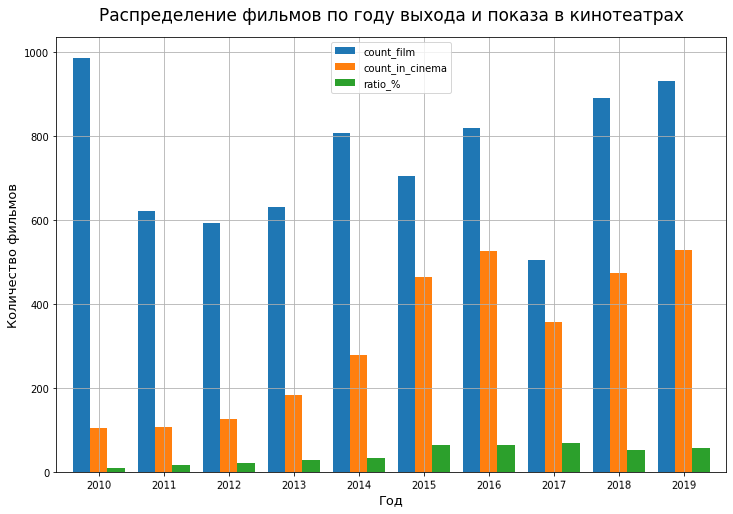

In [68]:
films.plot(kind='bar', x='year',figsize = (12, 8), width=0.8, grid=True, rot=1)

plt.xlabel('Год', size = 13)
plt.ylabel('Количество фильмов', size = 13)
plt.title('Распределение фильмов по году выхода и показа в кинотеатрах', pad=17, size = 17)

plt.show()

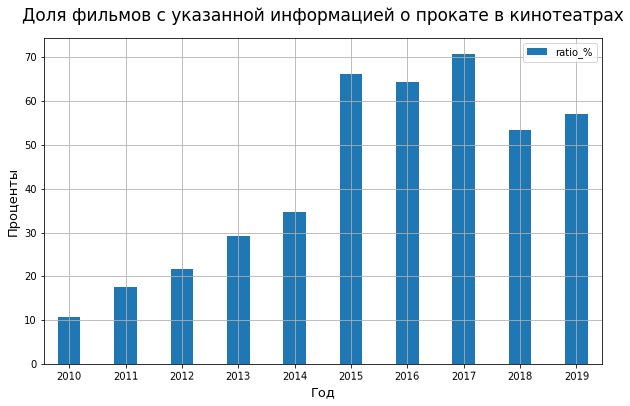

In [69]:
films.plot(kind='bar', x='year',y='ratio_%', figsize=(10, 6), width=0.4, grid=True, rot=1)

plt.xlabel('Год', size = 13)
plt.ylabel('Проценты', size = 13)
plt.title('Доля фильмов с указанной информацией о прокате в кинотеатрах', pad=17, size = 17)

plt.show()

#### Промежуточный вывод:


- **За иследуемый период в 2010 году выходило максимальное количество фильмов в прокат. Затем 3 года количество стабильно держалась в районе 600. Далее рост 2014-2016 года и просадка до отметки 505 в 2017 году. В 2018-2019 количество приблизилось к максимальной отметке.**
- **Данные о прокате в кинотеатрах известны не для всех фильмов. При этом количество фильмов без информации о сборах падает и одновременно растёт количество фильмов с известными сборами. В тоже время наблюдается просадка в 2017 году.**
- **Доля фильмов с указанной информацией о прокате растёт начиная в 2010 с 10.7%. В 2015-2017 годах наблюдается резкий рост почти в 2 раза и достигла максимума в 2017 году 70.7%.**
- **Изученная информация показывает рост, а значит и востребованость, оффлайн и онлайн конотеатров.**

### Как менялась динамика проката по годам.

In [70]:
data_pivot = data.pivot_table(index='show_start_year', values='box_office', aggfunc=['sum', 'count', 'max'])
display(data_pivot)
#print(f'В {data_pivot['sum'].min()} году минимальная сумма сборов, а в {data_pivot['sum'].max()} - максимальная.')

,sum,count,max
,box_office,box_office,box_office
show_start_year,,,
2010,2.428654e+06,105,1.446400e+06
2011,1.410276e+07,109,1.161808e+07
2012,6.955423e+06,128,2.311220e+06
2013,2.979971e+07,184,1.995703e+07
2014,7.444952e+09,279,1.016411e+09
2015,3.949737e+10,465,1.658861e+09
2016,4.786630e+10,526,2.048126e+09
2017,4.856371e+10,357,2.779686e+09


In [71]:
# Фильмы с самыми большими кассовыми сборами больше 2 млрд. рублей:
data.loc[data['box_office'] > 2.0e+09]

,title,pu_number,show_start_date,show_start_year,type,film_studio,production_country,director,director_main,producer,age_restriction,refundable_support,nonrefundable_support,total_support,total_support_percent,budget,financing_source,ratings,genres,genres_main,box_office
2858,Зверополис,124000316,2016-02-15 12:00:00+00:00,2016,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Рич Мур,Кларк Спенсер,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,8.3,"мультфильм,комедия,криминал",мультфильм,2.048126e+09
3487,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,2017,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Йоаким Реннинг,Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,6.6,"фэнтези,боевик,комедия",фэнтези,2.118396e+09
5652,Движение вверх,111011817,2017-12-21 12:00:00+00:00,2017,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000000.0,400000000.0,67.77,590192191.0,Фонд кино,7.5,"спорт,драма",спорт,2.779686e+09
6548,Т-34,111024918,2018-12-21 12:00:00+00:00,2018,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.0,120000000.0,180000000.0,31.93,563784717.0,Фонд кино,6.5,"драма,военный,боевик",драма,2.271754e+09
6819,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,2019,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Джо Руссо,Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,7.6,"фантастика,боевик,драма",фантастика,2.576614e+09
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,2019,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,60000000.0,37.50,160000000.0,Фонд кино,6.8,комедия,комедия,3.073569e+09


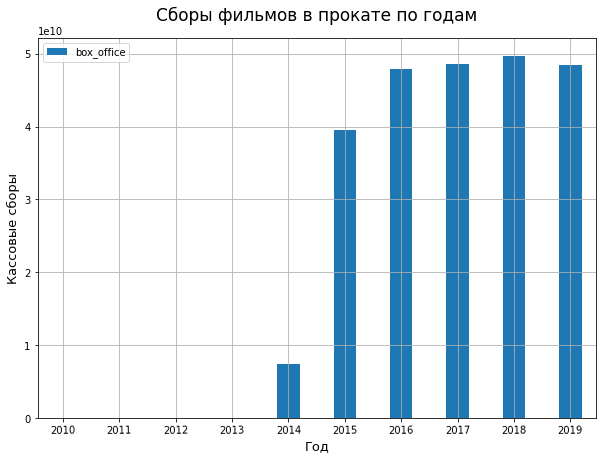

In [72]:
data_pivot['sum'].plot(kind='bar', figsize=(10, 7), width=0.4, grid = True, rot=1)

plt.xlabel('Год', size = 13)
plt.ylabel('Кассовые сборы', size = 13)
plt.title('Сборы фильмов в прокате по годам', pad=17, size = 17)

plt.show()

#### Промежуточный вывод:

- **Минимальная сумма кассовых сборов была в 2010 году.**
- **Максимальная сумма кассовых сборов в 2018 году и составила почти 50 млрд. рублей.**
- **В 2010-2014 годах не большое количество фильмов с информацией о кассовых сборах.**

### Средняя и медианная сумма сборов для каждого года.

,mean,median
,box_office,box_office
show_start_year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000


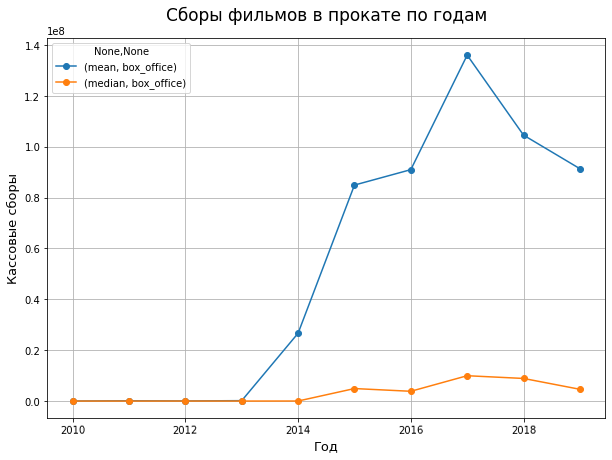

In [73]:
# создаем сводную таблицу:
data_box_office = data.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median'])
display(data_box_office)

# строим линейный график:
data_box_office.plot(style='o-', figsize=(10, 7), grid = True, rot=1)

plt.xlabel('Год', size = 13)
plt.ylabel('Кассовые сборы', size = 13)
plt.title('Сборы фильмов в прокате по годам', pad=17, size = 17)
plt.show()

#### Промежуточный вывод:

- **Максимальное среднее значение по кассовым сборам фильмов было в 2017 году 136 млн. рублей.**
- **Медианное значение на много меньше. Максимальное значении медианы в 2017 году почти 10 млн. рублей.**
- **Большая разница между среднем и медианной означает наличия фильмов с большой суммой кассового сбора.**

### Влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год.

In [74]:
data_age = data.query('2015 <= show_start_year <= 2019')

data_age.pivot_table(
    index=['age_restriction', 'show_start_year'],
    values='box_office',
    aggfunc=['count', 'sum', 'mean', 'median', 'max']
)

count  \
                                                       box_office   
age_restriction                        show_start_year              
«0+» - для любой зрительской аудитории 2015                    39   
                                       2016                    41   
                                       2017                     3   
                                       2018                     5   
                                       2019                     3   
«12+» - для детей старше 12 лет        2015                    73   
                                       2016                    82   
                                       2017                    41   
                                       2018                    67   
                                       2019                    85   
«16+» - для детей старше 16 лет        2015                   168   
                                       2016                   182   
                                       2017                   121   
                                       2018                   156   
                                       2019                   178   
«18+» - запрещено для детей            2015                   132   
                                       2016                   151   
                                       2017                   147   
                                       2018                   179   
                                       2019                   183   
«6+» - для детей старше 6 лет          2015                    53   
                                       2016                    70   
                                       2017                    45   
                                       2018                    68   
                                       2019                    81   

                                                                 sum  \
                                                          box_office   
age_restriction                        show_start_year                 
«0+» - для любой зрительской аудитории 2015             3.790546e+08   
                                       2016             1.502288e+08   
                                       2017             2.295989e+08   
                                       2018             3.244900e+07   
                                       2019             1.774607e+07   
«12+» - для детей старше 12 лет        2015             1.361608e+10   
                                       2016             1.220445e+10   
                                       2017             7.851428e+09   
                                       2018             1.426729e+10   
                                       2019             1.268020e+10   
«16+» - для детей старше 16 лет        2015             1.136812e+10   
                                       2016             1.666455e+10   
                                       2017             1.874504e+10   
                                       2018             1.650360e+10   
                                       2019             1.275342e+10   
«18+» - запрещено для детей            2015             5.432308e+09   
                                       2016             6.793930e+09   
                                       2017             9.651496e+09   
                                       2018             8.760086e+09   
                                       2019             1.012180e+10   
«6+» - для детей старше 6 лет          2015             8.701799e+09   
                                       2016             1.205315e+10   
                                       2017             1.208614e+10   
                                       2018             1.010497e+10   
                                       2019             1.285255e+10   

                                                                mean  \
                                      

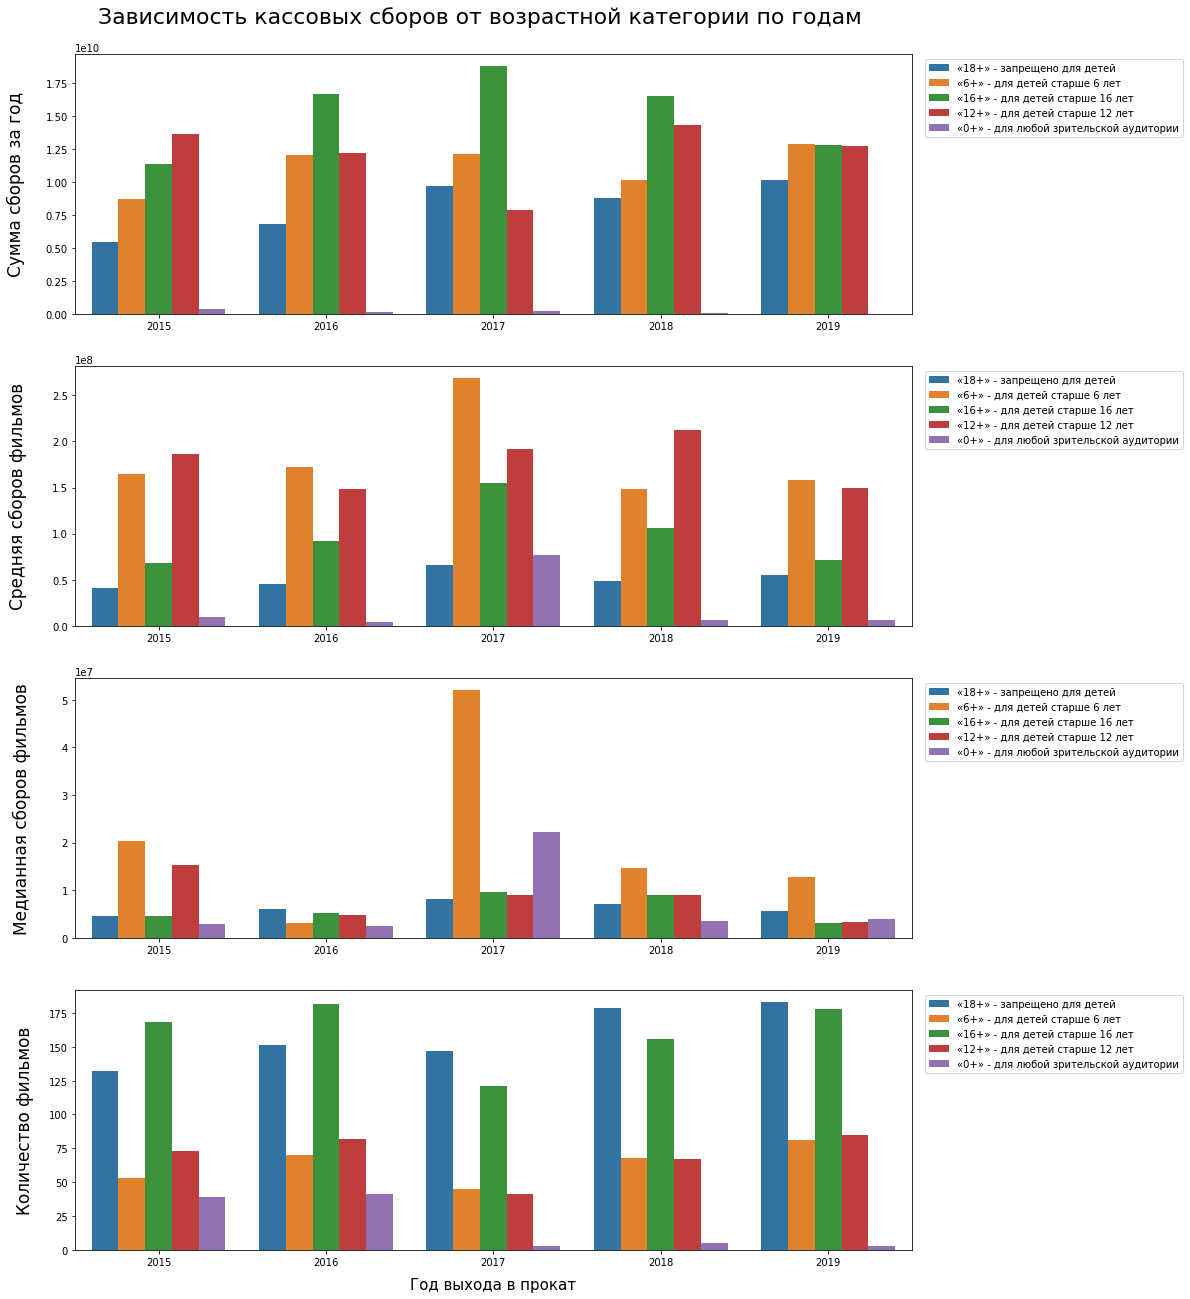

In [75]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 22))

sns.barplot(data=data_age,
    x='show_start_year', y='box_office', hue='age_restriction',
    ci=None, estimator=sum, ax=ax1)

sns.barplot(data=data_age,
    x='show_start_year', y='box_office', hue='age_restriction',
    ci=None, ax=ax2)

sns.barplot(data=data_age,
    x='show_start_year', y='box_office', hue='age_restriction',
    ci=None, estimator=np.median, ax=ax3)

sns.barplot(data=data_age,
    x='show_start_year', y='box_office', hue='age_restriction',
    ci=None, estimator=np.size, ax=ax4)

ax1.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax2.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax3.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax4.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('Год выхода в прокат', labelpad=10, size=15)
ax1.set_ylabel('Сумма сборов за год', labelpad=20, size=17)
ax2.set_ylabel('Средняя сборов фильмов', labelpad=25, size=17)
ax3.set_ylabel('Медианная сборов фильмов', labelpad=30, size=17)
ax4.set_ylabel('Количество фильмов', labelpad=15, size=17)
f.suptitle('Зависимость кассовых сборов от возрастной категории по годам', size=22, y=0.91)

plt.show()

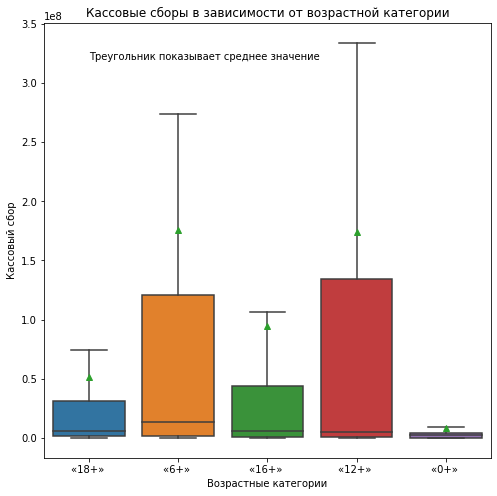

In [108]:
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['show_start_year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

#### Промежуточный вывод:

- **По сумме кассовых сборов в 2016-2018 годах лидирует категория фильмов «16+», немного отстаёт категория «12+». В 2015 всё наоборот.В 2019 году категории «6+», «12+», «16+» почти равны.**
- **Средняя по кассовым сборам в категориях «6+», «12+» по годам 2015-2019 почти стабильна, наблюдается скачок категории «6+» в 2017 году.**
- **Медианна показывает большой скачок категории «6+» в 2017 году. В категории «0+» также есть скачок в 2017 году.**
- **По количеству фильмов совсем иная картина. Здесь лидируют категории «16+» и «18+» с небольшой просадкой в 2017 году.**
- **По итогу: больше по количеству в прокат выходят фильмы «16+» и «18+», но категория семейных фильмов «6+» и «12+» более востребована. Вероятно это связанно с тем что кинотеатры больше посещают семьями или большими группами с детьми.**

### Промежуточный вывод

Входе проведённого исследовательского анализа данных было проаналировано следующее:
- Cколько фильмов выходило в прокат каждый год. Количество выхода фильмов в прокат ежегодно растёт. Изученная информация так же показывает  существенный рост показов фильмов в кинотеатрах.
- Как менялась динамика проката по годам. В 2010-2014 годах небольшое количество фильмов с информацией о кассовых сборах. С 2015 года сумма кассовых сборов постепенно растёт.
-  Средняя и медианная сумма сборов для каждого года. Максимальное среднее значение по кассовым сборам фильмов было в 2017 году 136 млн. рублей. Медианное значение на много меньше, максимальное значении медианы в 2017 году почти 10 млн. рублей. Большая разница между среднем и медианной означает наличия фильмов с большой суммой кассового сбора.
- Влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год. Больше по количеству в прокат выходят фильмы «16+» и «18+», но категория семейных фильмов «6+» и «12+» более востребована (больше кассовые сборы). Вероятно это связанно с тем что кинотеатры больше посещают семьями или большими группами с детьми.

## Исследование фильмов, которые получили государственную поддержку.

### Отфильтруем и создадим dataframe фильмов с гос. поддержкой.

In [76]:
data_support = data[data['total_support'] > 0].copy()
data_support.info()
display(data_support)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7477
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   pu_number              332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   show_start_year        332 non-null    int64              
 4   type                   332 non-null    object             
 5   film_studio            332 non-null    object             
 6   production_country     332 non-null    object             
 7   director               332 non-null    object             
 8   director_main          332 non-null    object             
 9   producer               332 non-null    object             
 10  age_restriction        332 non-null    object             
 11  refundable_support     332 non-null    float64        

,title,pu_number,show_start_date,show_start_year,type,film_studio,production_country,director,director_main,producer,age_restriction,refundable_support,nonrefundable_support,total_support,total_support_percent,budget,financing_source,ratings,genres,genres_main,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,2013,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,26500000.0,33.37,79411900.0,Министерство культуры,8.1,"драма,мелодрама",драма,3.653536e+05
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,2014,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,26000000.0,70.00,37142857.0,Министерство культуры,NaN,неизвестно,неизвестно,2.814000e+04
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,2013,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров",Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,107847945.0,61.27,176023490.0,Фонд кино,5.3,"комедия,фантастика",комедия,1.995703e+07
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,2014,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,28000000.0,69.01,40574140.0,Министерство культуры,4.2,драма,драма,5.591750e+04
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,2014,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,25000000.0,62.48,40015122.0,Министерство культуры,6.4,драма,драма,2.321000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,2019,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,500000000.0,51.02,980000000.0,Фонд кино,6.0,"история,биография,драма",история,7.177032e+08
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,2019,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов",Д.Шмидт,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,100000000.0,52.63,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",мультфильм,5.010692e+08
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,2019,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,500000000.0,52.97,944000000.0,Фонд кино,5.7,"фантастика,боевик",фантастика,NaN
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,2019,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,30000000.0,65.00,46154000.0,Министерство культуры,5.9,драма,драма,NaN


In [77]:
data_support['production_country'].value_counts()

Россия                                    316
Россия,Италия                               2
Россия,Германия                             2
Россия,Украина                              1
Россия,Франция,Латвия                       1
Россия,Словакия,Чехия                       1
Россия,Грузия                               1
Россия,Латвия,Чешская Республика            1
Россия,Армения                              1
Россия,Германия,Казахстан,Польша,Китай      1
Россия,Китай                                1
Россия,Украина,Польша                       1
Россия,Бельгия,Финляндия                    1
Россия,Германия,Великобритания              1
Россия,Сербия                               1
Name: production_country, dtype: int64

In [78]:
data_support.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pu_number,332.0,1.115938e+08,5.703031e+06,111000115.0,1.110049e+08,1.110104e+08,1.110178e+08,2.140101e+08
show_start_year,332.0,2.016720e+03,1.640637e+00,2013.0,2.015000e+03,2.017000e+03,2.018000e+03,2.019000e+03
refundable_support,332.0,1.186446e+07,2.491656e+07,0.0,0.000000e+00,0.000000e+00,1.500000e+07,1.800000e+08
nonrefundable_support,332.0,4.898099e+07,5.998012e+07,0.0,2.500000e+07,3.000000e+07,4.037500e+07,4.000000e+08
total_support,332.0,6.084545e+07,7.275546e+07,3000000.0,2.533375e+07,3.500000e+07,6.000000e+07,5.000000e+08
total_support_percent,332.0,5.220795e+01,1.666536e+01,4.4,3.846000e+01,6.133500e+01,6.546250e+01,7.000000e+01
budget,332.0,1.340837e+08,1.876776e+08,9771987.0,4.615397e+07,7.495500e+07,1.500021e+08,2.305074e+09
ratings,316.0,6.020886e+00,1.148943e+00,1.0,5.300000e+00,6.200000e+00,6.700000e+00,9.400000e+00
box_office,318.0,1.324324e+08,3.348379e+08,1550.0,1.236676e+06,1.572007e+07,1.063730e+08,3.073569e+09


- В данных представлены 316 фильмов российского производства и 16 совместного.
- У 14 фильмов отсутсвуют данные по кассовым сборам. Это меньше 5%. Заменить верными данными нет возможности. Оставим как есть.

### Распределение прибыли от проката фильмов по годам.

Добавим столбец `profit` - прибыль от проката.

In [79]:
data_support['profit'] = data_support['box_office'] - data_support['budget']
data_support['profit'].describe()

count    3.180000e+02
mean    -2.352814e+06
std      3.148470e+08
min     -1.971477e+09
25%     -7.315928e+07
50%     -4.258587e+07
75%     -1.004425e+07
max      2.913569e+09
Name: profit, dtype: float64

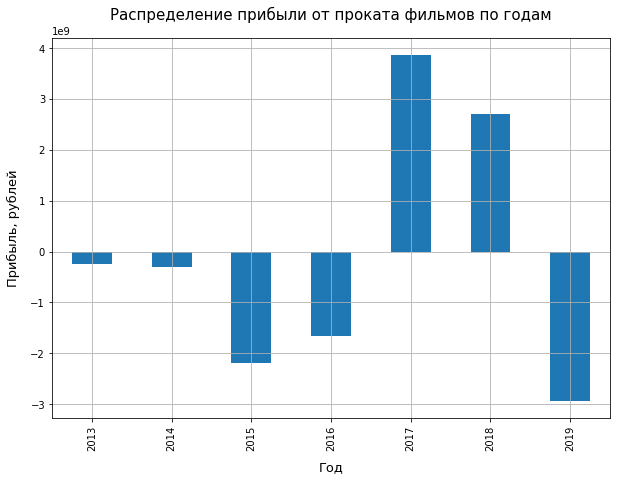

In [80]:
data_support.groupby('show_start_year')['profit']\
    .agg('sum')\
    .plot(kind='bar', grid=True, figsize=(10, 7))
    
plt.title('Распределение прибыли от проката фильмов по годам', pad = 18, size=15)
plt.xlabel('Год', labelpad=10, size=13)
plt.ylabel('Прибыль, рублей', labelpad=10, size=13)

plt.show()

**Вывод:**
- **Из графика видно что только в 2017 и 2018 была суммарная прибыль по фильмам с гос. поддержкой. Остальные года суммарная прибыль от проката убыточна.**
- **Данных по гос. поддержке до 2013 года нет.**

### Распределение кассовых сборов по годам.

In [81]:
data_support.groupby('show_start_year')['box_office'].agg('sum')

show_start_year
2013    2.032239e+07
2014    1.017422e+09
2015    5.785285e+09
2016    6.081708e+09
2017    1.086508e+10
2018    9.934069e+09
2019    8.409627e+09
Name: box_office, dtype: float64

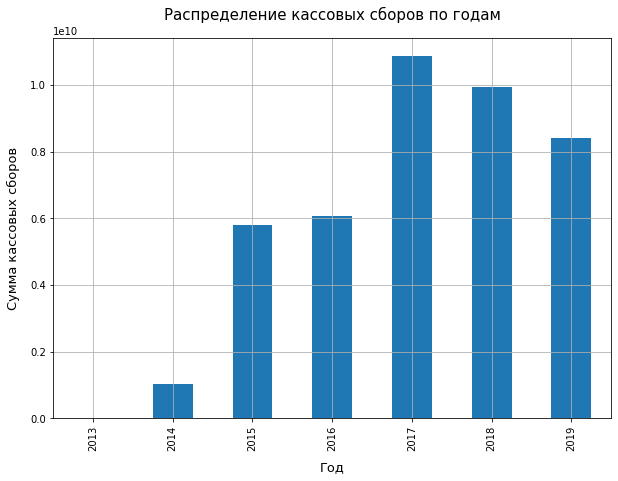

In [82]:
data_support.groupby('show_start_year')['box_office']\
    .agg('sum')\
    .plot(kind='bar', grid=True, figsize=(10, 7))
    
plt.title('Распределение кассовых сборов по годам', pad = 18, size=15)
plt.xlabel('Год', labelpad=10, size=13)
plt.ylabel('Сумма кассовых сборов', labelpad=10, size=13)

plt.show()

Text(0.5, 0, 'Кассовые сборы, млрд. рублей')

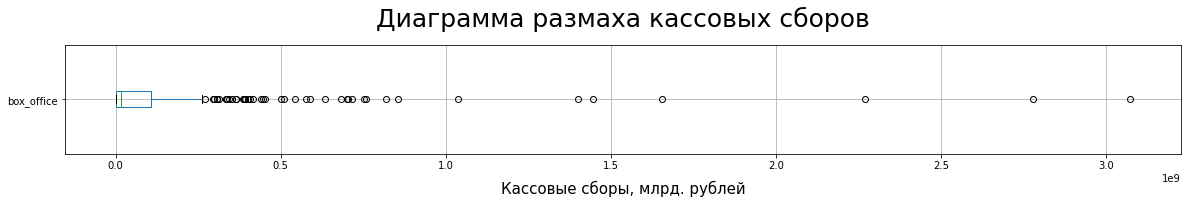

In [83]:
fig, ax = plt.subplots(figsize = (20,2))
ax = data_support[['box_office']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха кассовых сборов', pad = 18, size=25)
ax.set_xlabel('Кассовые сборы, млрд. рублей', labelpad=10, size=15)

Диаграмма размаха показывает наличие 7 фильмов с очень большими (от 1 до 3.1 млрд.рублей) и больше десятка фильмов с большими кассовыми сборами (от 0.5 до 1.0 млрд. рублей). Стоит их учитывать как удачные фильмы с гос. поддержкой. 

In [84]:
data_support[data_support['box_office'] > 1.0e+09].sort_values(by='box_office', ascending=False)

,title,pu_number,show_start_date,show_start_year,type,film_studio,production_country,director,director_main,producer,age_restriction,refundable_support,nonrefundable_support,total_support,total_support_percent,budget,financing_source,ratings,genres,genres_main,box_office,profit
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,2019,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,60000000.0,37.50,160000000.0,Фонд кино,6.8,комедия,комедия,3.073569e+09,2.913569e+09
5652,Движение вверх,111011817,2017-12-21 12:00:00+00:00,2017,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000000.0,400000000.0,67.77,590192191.0,Фонд кино,7.5,"спорт,драма",спорт,2.779686e+09,2.189494e+09
6548,Т-34,111024918,2018-12-21 12:00:00+00:00,2018,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.0,120000000.0,180000000.0,31.93,563784717.0,Фонд кино,6.5,"драма,военный,боевик",драма,2.271754e+09,1.707969e+09
5504,Последний богатырь,111007017,2017-10-19 12:00:00+00:00,2017,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000000.0,50000000.0,100000000.0,28.37,352477575.0,Фонд кино,6.8,"комедия,фэнтези,приключения",комедия,1.655038e+09,1.302560e+09
5707,Лёд,111000518,2018-02-01 12:00:00+00:00,2018,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000000.0,60000000.0,85000000.0,57.21,148585222.0,Фонд кино,NaN,неизвестно,неизвестно,1.445732e+09,1.297147e+09
2919,Экипаж .,111005416,2016-03-21 12:00:00+00:00,2016,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50000000.0,392104482.0,442104482.0,69.59,635283867.0,Фонд кино,7.6,"драма,триллер,приключения",драма,1.402255e+09,7.669715e+08
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,2016,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,250000000.0,61.40,407166123.8,Фонд кино,5.6,фантастика,фантастика,1.038321e+09,6.311554e+08


**Вывод:**
- **Самые большие кассовые сборы фильмов с гос. поддержкой были в 2017 году.**
- **В 2018-2019 году кассовые сборы падают.**
- **С 2013-2091 года есть 7 удачных фильмов с кассовыми сборами от 1 до 3.1 млрд.рублей.**

### Распределение гос. поддержки по годам.

In [85]:
data_support.groupby('show_start_year')['total_support'].sum()

show_start_year
2013    1.343479e+08
2014    5.720023e+08
2015    3.656241e+09
2016    4.303155e+09
2017    3.183972e+09
2018    3.446969e+09
2019    4.904000e+09
Name: total_support, dtype: float64

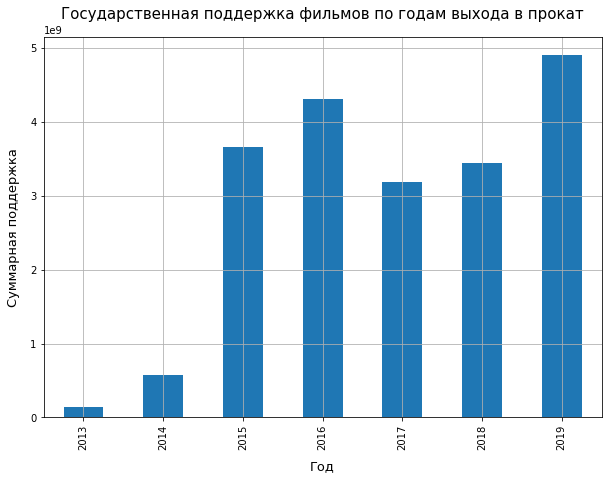

In [86]:
data_support.groupby('show_start_year')['total_support']\
    .agg('sum')\
    .plot(kind='bar', grid=True, figsize=(10, 7))

plt.xlabel('Год', labelpad = 10, size = 13)
plt.ylabel('Суммарная поддержка', labelpad = 10, size = 13)
plt.title('Государственная поддержка фильмов по годам выхода в прокат', pad = 18, size = 15)

plt.show()

**Вывод:**
- **По графику видно что в 2015 гос. поддержка киноиндустрии существенно подросла и в 2019 году ещё выросла на порядка 40%.**   

### Количество  фильмов с гос. поддержкой по годам.

In [87]:
data_support.groupby('show_start_year')['total_support'].count()

show_start_year
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    70
Name: total_support, dtype: int64

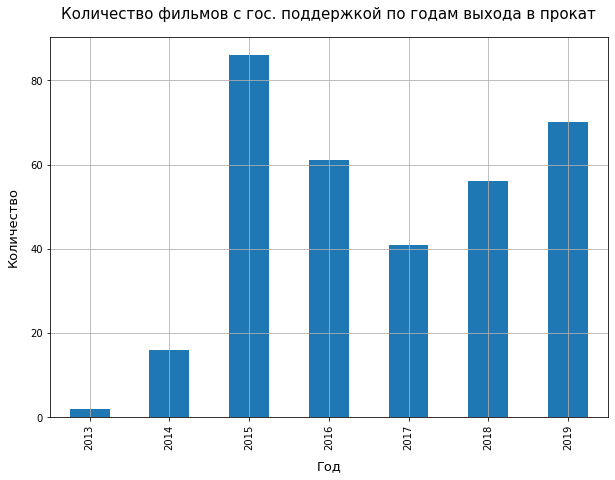

In [88]:
data_support.groupby('show_start_year')['total_support']\
    .agg('count')\
    .plot(kind='bar', grid=True, figsize=(10, 7))

plt.xlabel('Год', labelpad = 10, size = 13)
plt.ylabel('Количество', labelpad = 10, size = 13)
plt.title('Количество фильмов с гос. поддержкой по годам выхода в прокат', pad = 18, size = 15)

plt.show()

**Вывод:**
- **В 2015 году резкий скачёк количества фильмов с гос. поддержкой. Вероятно в этот год была дополнительная стимуляция киноиндустрии в виде увелечения фонда государственной киноподдержки.**
- **В 2016-2017 годах происходит снижение количества фильмов и далее в 2018-2019 рост.**

 ### Количество фильмов с гос. поддержкой по жанрам.

In [89]:
data_support\
    .query('genres_main != "неизвестно"')\
    .groupby('genres_main')['total_support']\
    .count()\
    .sort_values(ascending=False)

genres_main
драма          93
комедия        74
мультфильм     31
триллер        15
мелодрама      15
фантастика     11
фэнтези        11
ужасы          10
военный         9
приключения     7
семейный        7
боевик          6
детектив        5
история         4
детский         4
мюзикл          4
криминал        3
спорт           3
биография       3
реальное ТВ     1
Name: total_support, dtype: int64

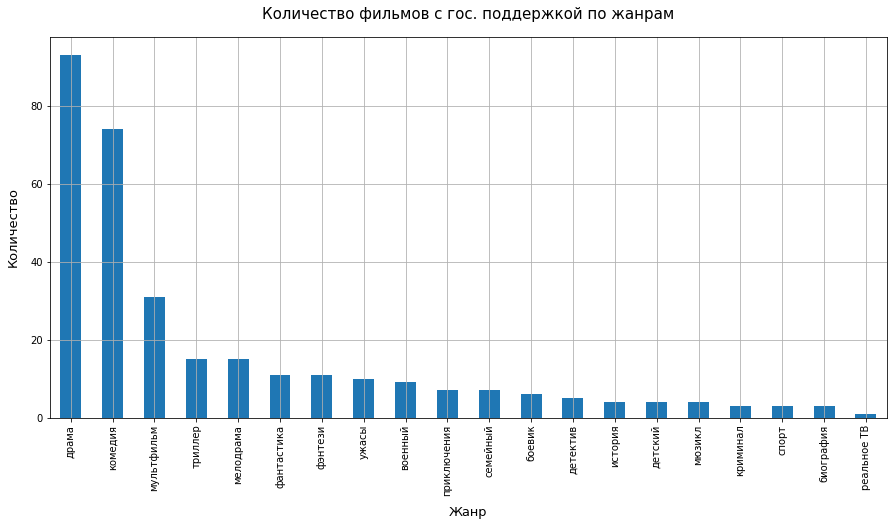

In [90]:
data_support.query('genres_main != "неизвестно"')\
    .groupby('genres_main')['total_support']\
    .agg('count')\
    .sort_values(ascending=False)\
    .plot(kind='bar', grid=True, figsize=(15, 7))

plt.xlabel('Жанр', labelpad = 10, size = 13)
plt.ylabel('Количество', labelpad = 10, size = 13)
plt.title('Количество фильмов с гос. поддержкой по жанрам', pad = 18, size = 15)

plt.show()

**Вывод**
- **Чаще всего с гос. поддержкой снимают фильмы в жанре "драма".**
- **На втором месте фильмы в жанре "комедия".**

### Количество фильмов с гос. поддержкой по возрастной категории.

In [91]:
data_support.groupby('age_restriction')['total_support'].count().sort_values(ascending=False)

age_restriction
«16+» - для детей старше 16 лет           125
«12+» - для детей старше 12 лет           106
«6+» - для детей старше 6 лет              65
«18+» - запрещено для детей                28
«0+» - для любой зрительской аудитории      8
Name: total_support, dtype: int64

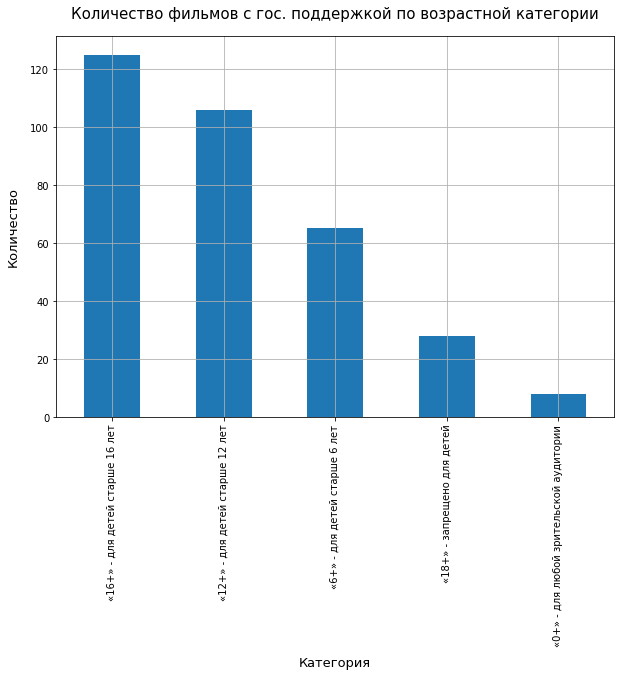

In [92]:
data_support.groupby('age_restriction')['total_support']\
    .agg('count')\
    .sort_values(ascending=False)\
    .plot(kind='bar', grid=True, figsize=(10, 7))

plt.xlabel('Категория', labelpad = 10, size = 13)
plt.ylabel('Количество', labelpad = 10, size = 13)
plt.title('Количество фильмов с гос. поддержкой по возрастной категории', pad = 18, size = 15)

plt.show()

**Вывод:**
- **Самая массовая возрастная категория фильмов это «16+» - для детей старше 16 лет.**
- **Немного меньше возрастная категория фильмов «12+» - для детей старше 12 лет.**

### Количество фильмов с гос. поддержкой по рейтингу на КиноПоиске.

In [93]:
data_support.groupby('ratings')['total_support'].count().sort_values(ascending=False)

ratings
6.2    23
5.8    17
6.6    17
6.3    16
6.7    14
6.1    13
6.9    10
6.8    10
6.5    10
6.4     9
5.1     8
6.0     8
5.7     8
5.3     8
5.2     8
5.4     8
5.6     7
5.9     7
4.8     7
7.3     7
7.0     7
5.0     7
4.9     7
7.4     6
7.5     6
4.7     5
4.5     4
4.3     4
7.7     4
5.5     4
3.2     4
7.8     4
7.2     4
7.1     4
7.6     3
8.5     2
2.9     2
8.0     2
3.9     2
4.0     2
4.2     2
4.6     2
7.9     2
8.2     1
9.0     1
8.1     1
1.0     1
2.5     1
3.8     1
3.5     1
3.3     1
3.1     1
3.0     1
2.8     1
9.4     1
Name: total_support, dtype: int64

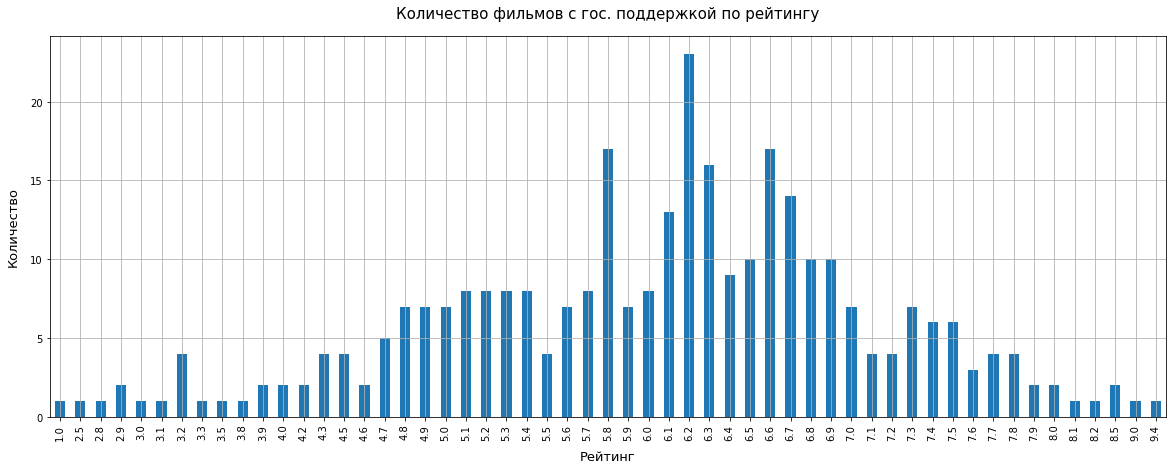

In [94]:
data_support.groupby('ratings')['total_support']\
    .agg('count')\
    .plot(kind='bar', grid=True, figsize=(20, 7))

plt.xlabel('Рейтинг', labelpad = 10, size = 13)
plt.ylabel('Количество', labelpad = 10, size = 13)
plt.title('Количество фильмов с гос. поддержкой по рейтингу', pad = 18, size = 15)

plt.show()

**Вывод:**
- **Больше всего фильмов с гос. поддержкой получили фильмы оценку 6.2 .**
- **Часто фильмы получают оценку 5.8; 6.3; 6.7.**

### Топ российских режиссёров фильмов с гос. поддержкой.

In [95]:
data_support.groupby('director_main')['total_support'].count().sort_values(ascending=False).head(10)

director_main
Р.Давлетьяров    5
Д.Дьяченко       4
С.Андреасян      4
С.Мокрицкий      3
А.Цицилин        3
Н.Хомерики       3
А.Котт           3
Д.Шмидт          3
К.Шипенко        3
А.Аксененко      3
Name: total_support, dtype: int64

In [96]:
data_support.pivot_table(index=['director_main'], values=['ratings'], aggfunc=['mean'])\
    .sort_values(('mean','ratings'),ascending=False)\
    .head(10)

,mean
,ratings
director_main,
Ю.Кара,9.4
Н.Степанова при участии С.Иванова,9.0
А.Атанесян,8.1
А.Попова,8.0
К.Оганисян,7.9
В.Татарский,7.8
И.Шахназаров,7.8
А.Андрианов,7.8


In [97]:
data_support.pivot_table(index=['director_main'], values=['box_office','profit'], aggfunc=['count','mean'])\
    .sort_values(('mean','profit'),ascending=False)\
    .head(15)

count                 mean  \
                                        box_office profit    box_office   
director_main                                                             
А.Мегердичев                                     1      1  2.779686e+09   
А.Сидоров                                        1      1  2.271754e+09   
О.Трофим                                         1      1  1.445732e+09   
К.Шипенко                                        3      3  1.275924e+09   
Н.Лебедев                                        1      1  1.402255e+09   
Ф.Бондарчук                                      1      1  1.038321e+09   
К.Феоктистов                                     1      1  7.592268e+08   
А.Першин (псевдоним Ж.Крыжовников)               1      1  6.830291e+08   
А.Черномазов (псевдоним Алексей Нужный)          1      1  6.334623e+08   
Д.Козловский                                     1      1  8.205280e+08   
Д.Дьяченко                                       4      4  6.012247e+08   
К.Бронзит                                        1      1  5.773689e+08   
Д.Киселев                                        2      2  6.998917e+08   
М.Бальчюнас (псевдоним Марюс Вайсберг)           1      1  4.397764e+08   
М.Бальчюнас                                      1      1  3.933446e+08   

                                                       
                                               profit  
director_main                                          
А.Мегердичев                             2.189494e+09  
А.Сидоров                                1.707969e+09  
О.Трофим                                 1.297147e+09  
К.Шипенко                                1.040947e+09  
Н.Лебедев                                7.669715e+08  
Ф.Бондарчук                              6.311554e+08  
К.Феоктистов                             5.847624e+08  
А.Першин (псевдоним Ж.Крыжовников)       5.524097e+08  
А.Черномазов (псевдоним Алексей Нужный)  5.458131e+08  
Д.Козловский                             4.303369e+08  
Д.Дьяченко                               4.060508e+08  
К.Бронзит                                3.918681e+08  
Д.Киселев                                3.484797e+08  
М.Бальчюнас (псевдоним Марюс Вайсберг)   3.383127e+08  
М.Бальчюнас                              3.159429e+08

In [98]:
display(data_support[data_support['director_main'] == 'А.Мегердичев'])
display(data_support[data_support['director_main'] == 'А.Сидоров'])

,title,pu_number,show_start_date,show_start_year,type,film_studio,production_country,director,director_main,producer,age_restriction,refundable_support,nonrefundable_support,total_support,total_support_percent,budget,financing_source,ratings,genres,genres_main,box_office,profit
5652,Движение вверх,111011817,2017-12-21 12:00:00+00:00,2017,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000000.0,400000000.0,67.77,590192191.0,Фонд кино,7.5,"спорт,драма",спорт,2.779686e+09,2.189494e+09


,title,pu_number,show_start_date,show_start_year,type,film_studio,production_country,director,director_main,producer,age_restriction,refundable_support,nonrefundable_support,total_support,total_support_percent,budget,financing_source,ratings,genres,genres_main,box_office,profit
6548,Т-34,111024918,2018-12-21 12:00:00+00:00,2018,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.0,120000000.0,180000000.0,31.93,563784717.0,Фонд кино,6.5,"драма,военный,боевик",драма,2.271754e+09,1.707969e+09


**Вывод:**
- **Больше всего фильмов с гос. поддержкой снял режиссёр Р.Давлетьяров в количестве 5 фильмов.**
- **На втором месте - Д.Дьяченко и С.Андреасян по 4 фильма.**
- **Самый большой рейтинг за фильм получили режиссёры Ю.Кара и Н.Степанова.**
- **Режиссеры с большими кассовыми сборами и прибылью за фильм это А.Мегердичев (фильм "Движение вверх") и А.Сидоров (фильм "Т-34").**

### Обзор фильмов в  2017 и в 2019 годах.

В 2017 году была самая большая прибыль по фильмам с гос. поддержкой, но при этом их количество всего 41 и самая низкая сумма гос. поддержки в интервале с 2015 по 2019 года.<br>
В 2019 году был самый большой убыток по фильмам с гос. поддержкой. Количество фильмов было 70 и самая высокая сумма поддержки в интервале 2015-2019 года.
Для сравнения эти двух годов возьмём фильмы в которых жанр фильма известен.

In [99]:
data_support_2017 = data_support.query('show_start_year == 2017 and genres_main != "неизвестно"').sort_values('box_office', ascending=False)
print('Фильмов в 2017 году с известными жанрами:',len(data_support_2017))
data_support_2017

Фильмов в 2017 году с известными жанрами: 39


,title,pu_number,show_start_date,show_start_year,type,film_studio,production_country,director,director_main,producer,age_restriction,refundable_support,nonrefundable_support,total_support,total_support_percent,budget,financing_source,ratings,genres,genres_main,box_office,profit
5652,Движение вверх,111011817,2017-12-21 12:00:00+00:00,2017,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000000.0,400000000.0,67.77,5.901922e+08,Фонд кино,7.5,"спорт,драма",спорт,2.779686e+09,2.189494e+09
5504,Последний богатырь,111007017,2017-10-19 12:00:00+00:00,2017,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000000.0,50000000.0,100000000.0,28.37,3.524776e+08,Фонд кино,6.8,"комедия,фэнтези,приключения",комедия,1.655038e+09,1.302560e+09
5640,Ёлки Новые,111011617,2017-12-21 12:00:00+00:00,2017,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...",Д.Киселев,"Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,50000000.0,50000000.0,100000000.0,57.35,1.743819e+08,Фонд кино,5.8,"комедия,мелодрама",комедия,8.554511e+08,6.810691e+08
5658,Три богатыря и принцесса Египта,114003317,2017-12-21 12:00:00+00:00,2017,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Феоктистов,К.Феоктистов,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,50000000.0,0.0,50000000.0,28.66,1.744644e+08,Фонд кино,5.5,"мультфильм,приключения,семейный",мультфильм,7.592268e+08,5.847624e+08
5501,Салют-7,111006917,2017-10-01 12:00:00+00:00,2017,Художественный,"ООО ""Лемон Филмз Студио""",Россия,К.Шипенко,К.Шипенко,"С.Сельянов, Б.Бакурадзе, А.Златопольский",«12+» - для детей старше 12 лет,0.0,225000000.0,225000000.0,45.57,4.937340e+08,Фонд кино,7.4,"драма,приключения,триллер",драма,7.526798e+08,2.589458e+08
5568,Легенда о Коловрате,111007617,2017-11-30 12:00:00+00:00,2017,Художественный,"ООО ""Продюсерский центр ИВАН""",Россия,И.Шурховецкий,И.Шурховецкий,"ООО ""Централ Партнершип"", АО ""Тел...",«12+» - для детей старше 12 лет,100000000.0,250000000.0,350000000.0,70.00,5.000127e+08,Фонд кино,6.4,"история,боевик,фэнтези",история,5.904051e+08,9.039234e+07
3254,Время первых (2017),111001317,2017-02-21 12:00:00+00:00,2017,Художественный,"ООО ""ТаББаК"", ООО ""Студия Третий Рим""",Россия,Д.Киселев,Д.Киселев,"Т.Бекмамбетов, Е.Миронов",«6+» - для детей старше 6 лет,75000000.0,175000000.0,250000000.0,47.31,5.284420e+08,Фонд кино,7.5,"приключения,триллер,биография",приключения,5.443323e+08,1.589028e+07
5436,Матильда,111005717,2017-08-17 12:00:00+00:00,2017,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.0,190000000.0,300000000.0,29.04,1.032906e+09,Фонд кино,7.7,"фэнтези,комедия,семейный",фэнтези,5.117755e+08,-5.211304e+08
5515,Фиксики. Большой секрет,114002517,2017-10-28 12:00:00+00:00,2017,Анимационный,"ЗАО ""Аэроплан""",Россия,"А.Колпин, И.Пшонкин, В.Бедошвили",А.Колпин,Г.Васильев,«6+» - для детей старше 6 лет,20000000.0,50000000.0,70000000.0,31.91,2.193985e+08,Фонд кино,6.9,"мультфильм,приключения,комедия",мультфильм,4.163491e+08,1.969506e+08
3320,Крым (2017),111002017,2017-04-12 12:00:00+00:00,2017,Художественный,"ООО ""Пиманов и партнеры""",Россия,А.Пиманов,А.Пиманов,А.Пиманов,«16+» - для детей старше 16 лет,20000000.0,30123915.0,50123915.0,22.53,2.225138e+08,Фонд кино,2.9,"драма,боевик",драма,3.428987e+08,1.203849e+08


In [100]:
data_support_2019 = data_support.query('show_start_year == 2019 and genres_main != "неизвестно"').sort_values('box_office', ascending=False)
print('Фильмов в 2019 году с известными жанрами:',len(data_support_2019))
data_support_2019

Фильмов в 2019 году с известными жанрами: 67


,title,pu_number,show_start_date,show_start_year,type,film_studio,production_country,director,director_main,producer,age_restriction,refundable_support,nonrefundable_support,total_support,total_support_percent,budget,financing_source,ratings,genres,genres_main,box_office,profit
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,2019,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,60000000.0,37.50,160000000.0,Фонд кино,6.8,комедия,комедия,3.073569e+09,2.913569e+09
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,2019,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,500000000.0,51.02,980000000.0,Фонд кино,6.0,"история,биография,драма",история,7.177032e+08,-2.622968e+08
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,2019,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов",Д.Шмидт,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,100000000.0,52.63,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",мультфильм,5.010692e+08,3.110692e+08
6631,Бабушка лёгкого поведения 2,111000519,2019-01-23 12:00:00+00:00,2019,Художественный,"ООО ""Вайс Филмс""",Россия,М.Бальчюнас (псевдоним Марюс Вайсберг),М.Бальчюнас (псевдоним Марюс Вайсберг),"А.Ревва, М.Бальчюнас (псевдоним Марюс Вайсберг)",«16+» - для детей старше 16 лет,0.0,40000000.0,40000000.0,39.42,101463696.0,Министерство культуры,5.3,комедия,комедия,4.397764e+08,3.383127e+08
6854,Миллиард,111006719,2019-04-17 12:00:00+00:00,2019,Художественный,"ООО ""Медиа Юниверсал Ивент""",Россия,Р.Прыгунов,Р.Прыгунов,"В.Маслов, В.Верещагин, Б.Анисимов",«12+» - для детей старше 12 лет,0.0,140000000.0,140000000.0,58.32,240041307.0,Фонд кино,8.2,драма,драма,4.086467e+08,1.686054e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00+00:00,2019,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.0,3000000.0,3000000.0,9.09,33000000.0,Министерство культуры,8.0,семейный,семейный,NaN,NaN
7228,На Луне,111015519,2019-11-01 12:00:00+00:00,2019,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.0,35000000.0,35000000.0,60.47,57876000.0,Министерство культуры,6.6,"приключения,триллер",приключения,NaN,NaN
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,2019,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,500000000.0,52.97,944000000.0,Фонд кино,5.7,"фантастика,боевик",фантастика,NaN,NaN
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,2019,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,30000000.0,65.00,46154000.0,Министерство культуры,5.9,драма,драма,NaN,NaN


In [101]:
data_support_2017.pivot_table(
    index=['genres_main'],
    values=['box_office', 'profit'],
    aggfunc=['count', 'sum', 'mean', 'max']
).style.background_gradient('Oranges').format('{:,.2f}')

In [102]:
print('Сумма кассовых сборов фильмов в 2017 году:',data_support_2017['box_office'].sum(),' и общая прибыль', data_support_2017['profit'].sum())

Сумма кассовых сборов фильмов в 2017 году: 10858503776.96  и общая прибыль 3929873513.8599997


In [103]:
data_support_2019.pivot_table(
    index=['genres_main'],
    values=['box_office', 'profit'],
    aggfunc=['count', 'sum', 'mean', 'max']
).style.background_gradient('Oranges').format('{:,.2f}')

In [104]:
print('Сумма кассовых сборов фильмов в 2019 году:',data_support_2019['box_office'].sum(),' и общая прибыль', data_support_2019['profit'].sum())

Сумма кассовых сборов фильмов в 2019 году: 8406149551.079999  и общая прибыль -2748063826.0199995


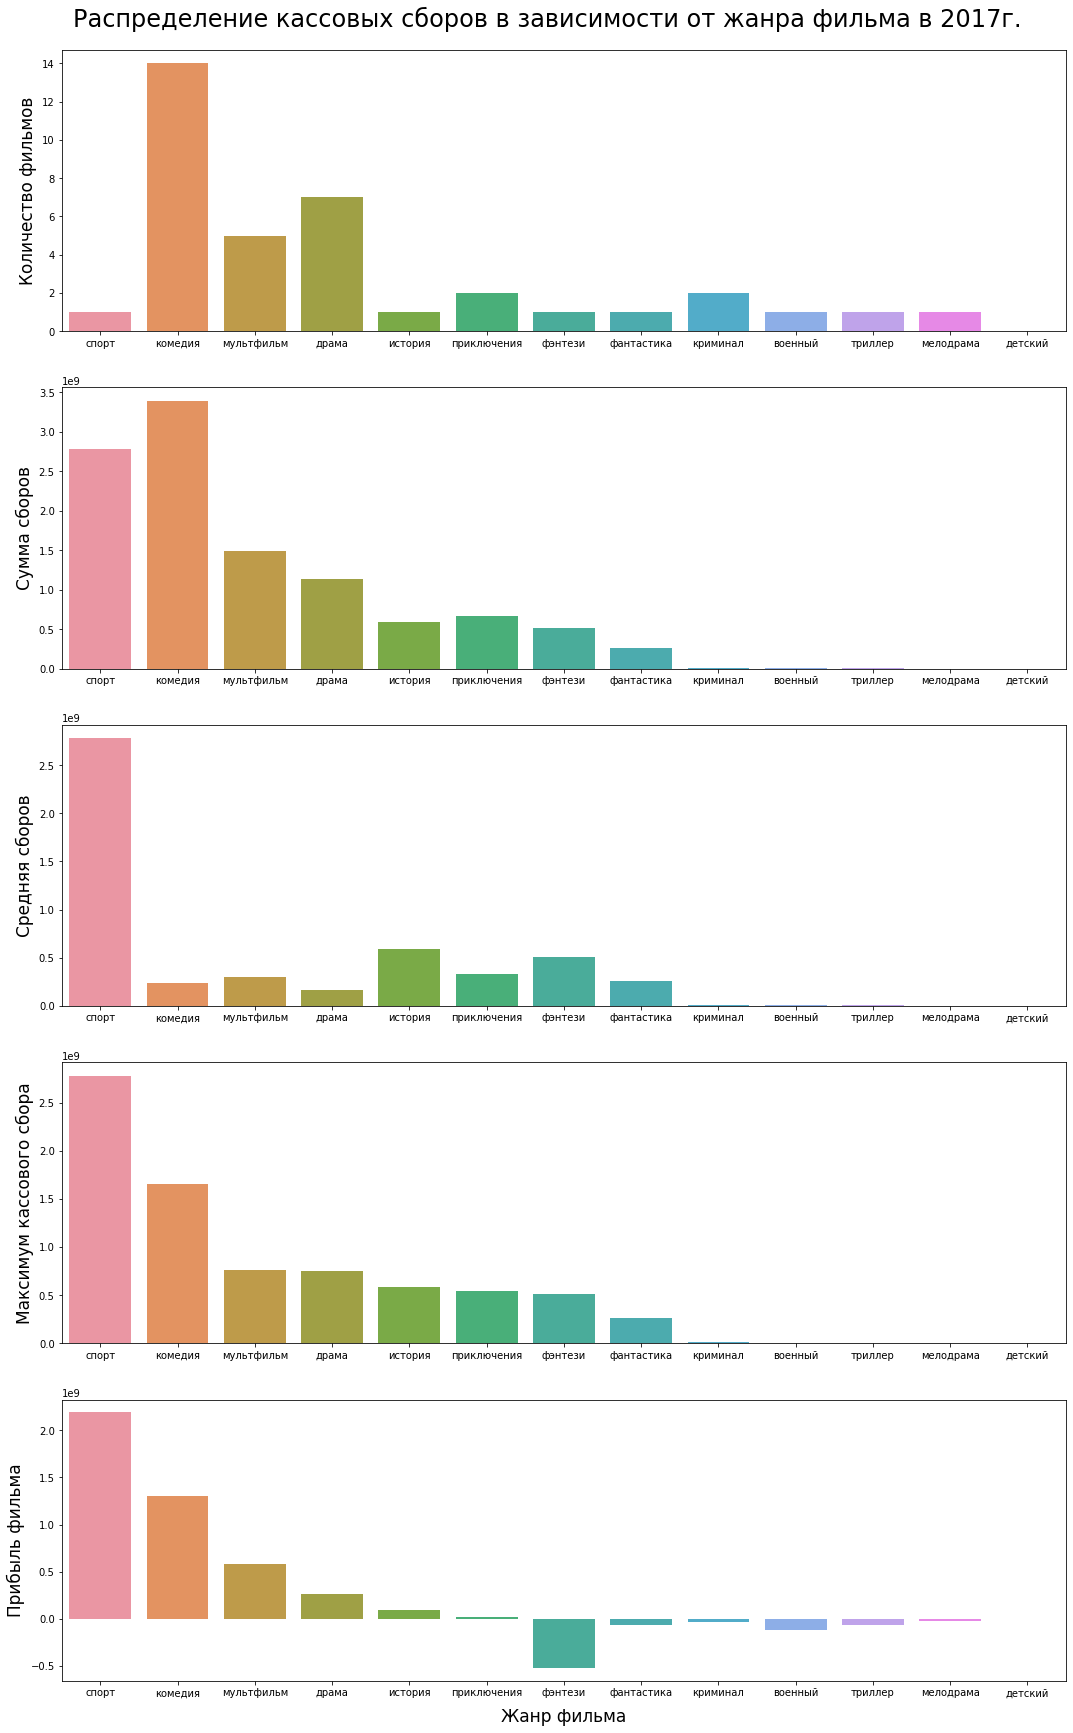

In [105]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(18, 30))

sns.barplot(data=data_support_2017,
    x='genres_main', y='box_office',
    ci=None, estimator=np.size, ax=ax1)

sns.barplot(data=data_support_2017,
    x='genres_main', y='box_office',
    ci=None, estimator=sum, ax=ax2)

sns.barplot(data=data_support_2017,
    x='genres_main', y='box_office',
    ci=None, ax=ax3)

sns.barplot(data=data_support_2017,
    x='genres_main', y='box_office',
    ci=None, estimator=np.max, ax=ax4)

sns.barplot(data=data_support_2017,
    x='genres_main', y='profit',
    ci=None, estimator=np.max, ax=ax5)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax5.set_xlabel('Жанр фильма', labelpad=10, size=17)
ax1.set_ylabel('Количество фильмов', labelpad=5, size=17)
ax2.set_ylabel('Сумма сборов', labelpad=5, size=17)
ax3.set_ylabel('Средняя сборов', labelpad=5, size=17)
ax4.set_ylabel('Максимум кассового сбора', labelpad=5, size=17)
ax5.set_ylabel('Прибыль фильма', labelpad=5, size=17)
f.suptitle('Распределение кассовых сборов в зависимости от жанра фильма в 2017г.', size=24, y=0.9)

plt.show()

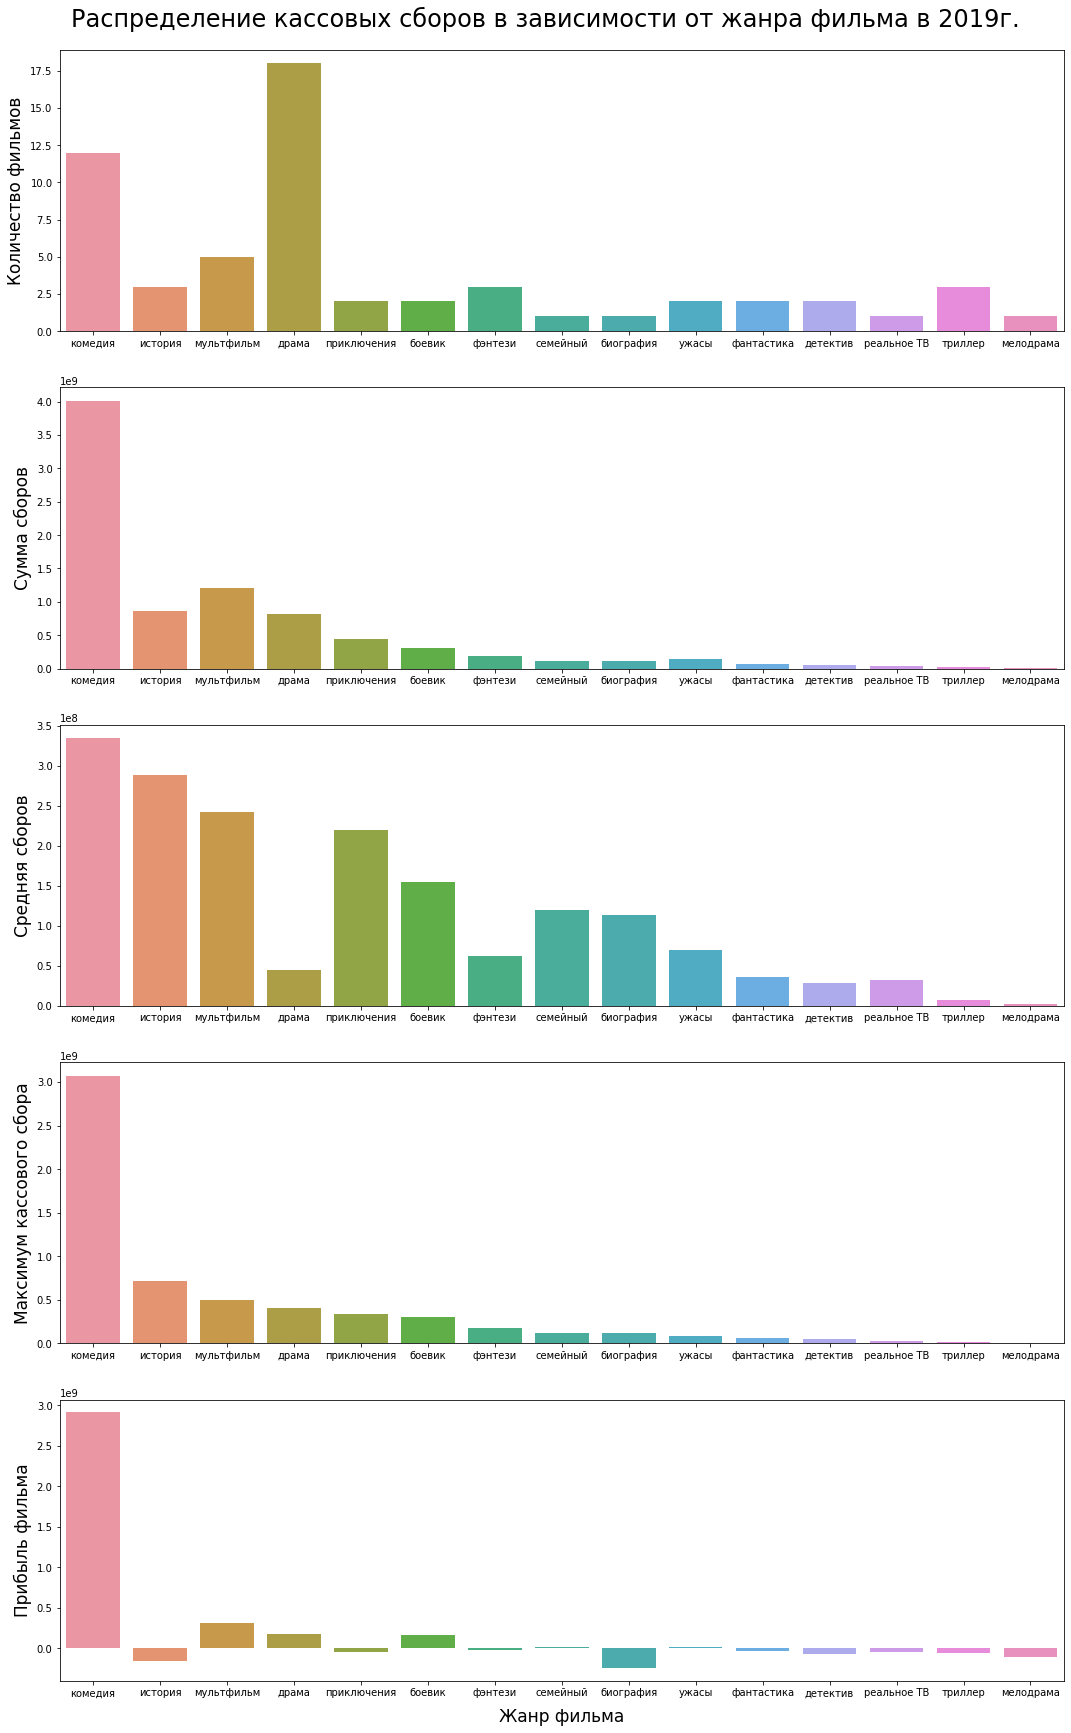

In [106]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(18, 30))

sns.barplot(data=data_support_2019,
    x='genres_main', y='box_office',
    ci=None, estimator=np.size, ax=ax1)

sns.barplot(data=data_support_2019,
    x='genres_main', y='box_office',
    ci=None, estimator=sum, ax=ax2)

sns.barplot(data=data_support_2019,
    x='genres_main', y='box_office',
    ci=None, ax=ax3)

sns.barplot(data=data_support_2019,
    x='genres_main', y='box_office',
    ci=None, estimator=np.max, ax=ax4)

sns.barplot(data=data_support_2019,
    x='genres_main', y='profit',
    ci=None, estimator=np.max, ax=ax5)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax5.set_xlabel('Жанр фильма', labelpad=10, size=17)
ax1.set_ylabel('Количество фильмов', labelpad=5, size=17)
ax2.set_ylabel('Сумма сборов', labelpad=5, size=17)
ax3.set_ylabel('Средняя сборов', labelpad=5, size=17)
ax4.set_ylabel('Максимум кассового сбора', labelpad=5, size=17)
ax5.set_ylabel('Прибыль фильма', labelpad=5, size=17)
f.suptitle('Распределение кассовых сборов в зависимости от жанра фильма в 2019г.', size=24, y=0.9)

plt.show()

**Вывод:**
- **В 2017 году было снято 41 фильм с гос. поддержкой. Больше всего было снято комедий - 14 шт., драм - 7 шт., мультфильмов - 5 шт.. Больше всего сборов было в жанре "комедия" - 3.4 млрд., "спорт" - 2.8 млрд. и "мультфильм" - 1.5 млрд. рублей. Прибыль от проката принесли жанры: "спорт", "комедия", "мультфильм". Остальные жанры прибыль были почти убыточны или убыточны. Выделяется жанр "спорт" с единственным фильмом в 2017 году "Движение вверх", который собрал больше всего кассовых сборов и принес большую долю прибыли российской киноиндустрии (прибыль 2.2 млрд.руб.).**
- **В 2019 году было снято 70 фильмов с гос. поддержкой. Больше всего было снято в жанре "драма" - 18 шт. и "комедия" - 12 шт.. Больше всего сборов было в жанре "комедия"- 4 млрд. рублей, а остольные жанры имеют не большую сумму сборов. По прибыли также выделяется жанр "комедия". В жанре "комедия" в 2019 году выделяется фильм "Холоп" с самыми большими сборами почти 3 млрд. рублей и который составил львиную долю сборов и прибыли в жанре "комедия". В жанре "драма" есть несколько фильмов у которух отсутствует данные о сборах, возможно с наличием данных картина была иначе.**
- **Сравнивая 2017 и 2019 года по распределению кассовых сборов в зависимости от жанра фильма можно отметить, что в 2019 стало больше жанров фильмов - добавились ужасы, биография, семейные, не стало жанра "спорт". Сумма кассовых сборов фильмов в 2017 году почти 10.9 млрд.  и общая прибыль 3.9 млрд. рублей. Сумма кассовых сборов фильмов в 2019 году 8.4 млрд. рублей и общая прибыль -2.75 млрд. рублей(убыток). То есть 2019 был гораздо хуже для кинопроката. Но как говорилось ранее данные не точные, так как есть фильмы без данных о сборах.**

### Промежуточный вывод.

- **Входе иследования фильмов с гос. поддержкой были рассмотрены разные данные:**
 - **распределение прибыли от проката фильмов по годам. Прибыль была в 2017-2018годах с максимум в 2017, 2013-2016 и 2019 - были убыточные.**
 - **распределение кассовых сборов по годам. В 2017 году были самые большие кассовые сборы, в 2018-2019 они падают.**
 - **распределение гос. поддержки по годам. В 2015 гос. поддержка киноиндустрии существенно подросла и в 2019 году ещё выросла на 40%.**
 - **количество фильмов с гос. поддержкой по годам. В 2015 году был резкий скачёк количества фильмов с гос. поддержкой.**
 - **количество фильмов с гос. поддержкой по жанрам. Чаще всего с гос. поддержкой снимают фильмы в жанре "драма" и "комедия".**
 - **количество фильмов с гос. поддержкой по возрастной категории. Больше фильмов категории «16+» и «12+».**
 - **количество фильмов с гос. поддержкой по рейтингу на КиноПоиске. Чаще фильмы получают оценку 5.8; 6.2; 6.3; 6.7.**
 - **Топ российских режиссёров фильмов с гос. поддержкой. Больше всего фильмов с гос. поддержкой сняли режиссёры Р.Давлетьяров,  Д.Дьяченко и С.Андреася.**
 - **обзор фильмов в 2017 и в 2019 годах. В 2019 году в отличие от 2017 сняли на 29 фильмов больше с большим количеством жанров. По прибыли 2019 год был хуже для российской киноидустрии, но данные не точны, так как есть фильмы с отсутвующими данными о кассовых сборах.**
 
**Можно сделать вывод что гос. поддержка существенно влияет на российскую киноиндустрию. Значительно увеличилось количество фильмов в разных жанрах. Больше стало выходить кассовых фильмов, которые в свою очередь популярны и интересны российскому зрителю.**<br>
**2015-2019 года это рассвет российской киноидустрии. Время проб и ошибок. Период не достаточно большой для полного изучения, но судя по последним годам ошибки были учтены и динамика идёт в положительную сторону.**

## Шаг 5. Напишите общий вывод

**В ходе исследования рынка российского кинопроката за 2010-2019 года были выполнены следующие этапы и сделаны выводы:**
1. **Изучили общую информацию о данных:**<br>
Дано две таблицы mkrf_movies и mkrf_shows. В первой таблице 7486 строки и 14 столбца, во второй 3158 строки и 2 столбца. Один явный дубликат удалён. В некоторых стобцах имеются пропуски и некорректный тип данных. Таблицы объеденили в одну по столбцу puNumber-номер прокатного удостоверения. В финальной таблице data содержит 7484 записи в 16 столбцах.
2. **Выполнена предобработка данных:**
- Переменован столбец puNumber в соответствии стандарта PEP8.
- Исправили некорректные значения в столбце `ratings`.
- В двух столбцах `show_start_date` и `ratings` поменяли тип данных.
- В столбцах `genres`, `producer`, `film_studio`,`director` пропуски заменили на значение  "неизвестно".
- В столбце `production_country` 2 пропуска заменили на подходящее значение "Россия".
- Изучены дубликаты в столбце `pu_number`, приняли решение оставить без изменения.  Совпадения в столбце `title` не являются дубликатами.
- В столбцах `type` и `production_country` убраны лишние пробелы и расставлены "," вместо "-" в значениях.
3. **Сделаны расчёты и добавлены новые столбцы:**
- Столбец `show_start_year` с информацией о годе проката.
- Два столбца: `director_main`- с именем и фамилией главного режиссёра и `genres_main`- основным жанром фильма.
- Столбец `total_support` в котором суммируются данные о возвратной и невозвратной государственной поддержки.
- Посчитано, какую долю от общего бюджета фильма составляет государственная поддержка в % и создан столбец `total_support_percent`.
4. **Проведен исследовательский анализ данных:**
- Cколько фильмов выходило в прокат каждый год. Количество выхода фильмов в прокат ежегодно растёт. Изученная информация так же показывает  существенный рост показов фильмов в кинотеатрах.
- Как менялась динамика проката по годам. В 2010-2014 годах небольшое количество фильмов с информацией о кассовых сборах. С 2015 года сумма кассовых сборов постепенно растёт.
-  Средняя и медианная сумма сборов для каждого года. Максимальное среднее значение по кассовым сборам фильмов было в 2017 году 136 млн. рублей. Медианное значение на много меньше, максимальное значении медианы в 2017 году почти 10 млн. рублей. Большая разница между среднем и медианной означает наличия фильмов с большой суммой кассового сбора.
- Влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год. Больше по количеству в прокат выходят фильмы «16+» и «18+», но категория семейных фильмов «6+» и «12+» более востребована (больше кассовые сборы). Вероятно это связанно с тем что кинотеатры больше посещают семьями или большими группами с детьми.
5. **Исследованы фильмы, которые получили государственную поддержку.**
-  Распределение прибыли от проката фильмов по годам. Данных по гос. поддержке до 2013 года нет. В 2017 и 2018 была суммарная прибыль по фильмам с гос. поддержкой. Остальные года прокат фильмов с гос. поддержкой нёс убытки.
-  Распределение кассовых сборов по годам. Самые большие кассовые сборы фильмов с гос. поддержкой были в 2017 году. Даоее в 2018-2019 году кассовые сборы падают. С 2013-2019года есть 7 удачных фильмов с кассовыми сборами от 1 до 3.1 млрд.рублей.
- Распределение гос. поддержки по годам. В 2015 году резкий скачёк количества фильмов с гос. поддержкой. Вероятно в этот год была дополнительная стимуляция киноиндустрии в виде увеличения фонда государственной киноподдержки. В 2016-2017 годах происходит снижение количества фильмов и далее в 2018-2019 рост. Скорей всего это связанно с тем что съёмка фильма это довольно длительный процесс. 
- Количество фильмов с гос. поддержкой по жанрам. Чаще всего с гос. поддержкой снимают фильмы в жанре "драма" и "комедия".
- Количество фильмов с гос. поддержкой по возрастной категории. Больше фильмов снимают категории «16+» и «12+».
- Количество фильмов с гос. поддержкой по рейтингу на КиноПоиске. Чаще фильмы получают оценку в пределах 5.8 - 6.7 балов.
- Топ российских режиссёров фильмов с гос. поддержкой. Больше всего фильмов с гос. поддержкой сняли режиссёры Р.Давлетьяров, Д.Дьяченко и С.Андреася.
- Обзор фильмов в 2017 и в 2019 годах. В 2019 году в отличие от 2017 сняли на 29 фильмов больше (70 и 41 соответсвенно) с большим количеством жанров (15 и 13 соответсвенно). По прибыли 2019 год был хуже для российской киноидустрии, но данные возможно не точны, так как есть фильмы с отсутвующими данными о кассовых сборах.
- Сделан вывод: Гос. поддержка существенно влияет на российскую киноиндустрию. Значительно увеличилось количество фильмов в разных жанрах. Больше стало выходить кассовых фильмов, которые в свою очередь популярны и интересны российскому зрителю и получают высокие оценки.
В иследовании фильмов с гос. поддержкой участвовало не много фильмов, в отфильтрованой таблице всего 332 строки, за период 2013-2019 года. Но можно с увереностью сказать что это период рассвета российской киноиндустрии.

6. **Итог:**<br>
Популярность кинопросмотра и в частности кинотеатров растёт. Поход в кино семьёй или просмотр фильмов компанией друзей становится популярным видом проведения досуга. Это подтверждается популярностью категории семейных фильмов «6+», «12+», «16+» и большими кассовыми сборами и высокими оценками удачных фильмов. Среди жанров фильмов более востребованы "комедия", но так же востребованы и другие жанры: драма, спорт, мультфильмы, история, приключения.